# **EXPLORING DATA**

In [1]:
#importing necessary libraries
import cv2
import matplotlib.pyplot as plt
import glob
from glob import glob
from pathlib import Path
from sklearn import *
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [2]:
#accessing images
data = glob('/Users/anushrisapate/Desktop/a/alz/**/*.jpg', recursive=True)
print('No. of Images in the directory ', len(data))

No. of Images in the directory  11772


In [3]:
#exploring number of data in each directory
#train
data_MildDemented_train = glob('/Users/anushrisapate/Desktop/a/alz/train/MildDemented/*.jpg', recursive=True)
data_ModerateDemented_train = glob('/Users/anushrisapate/Desktop/a/alz/train/ModerateDemented/*.jpg', recursive=True)
data_NonDemented_train = glob('/Users/anushrisapate/Desktop/a/alz/train/NonDemented/*.jpg', recursive=True)
data_VeryMildDemented_train = glob('/Users/anushrisapate/Desktop/a/alz/train/VeryMildDemented/*.jpg', recursive=True)
#test
data_MildDemented_test= glob('/Users/anushrisapate/Desktop/a/alz/test/MildDemented/*.jpg', recursive=True)
data_ModerateDemented_test = glob('/Users/anushrisapate/Desktop/a/alz/test/ModerateDemented/*.jpg', recursive=True)
data_NonDemented_test = glob('/Users/anushrisapate/Desktop/a/alz/test/NonDemented/*.jpg', recursive=True)
data_VeryMildDemented_test = glob('/Users/anushrisapate/Desktop/a/alz/test/VeryMildDemented/*.jpg', recursive=True)

print('No. of files in the directory Mild Demented:', len(data_MildDemented_train)+len(data_MildDemented_test))
print('No. of files in the directory Moderate Demented:', len(data_ModerateDemented_train)+len(data_ModerateDemented_test))
print('No. of files in the directory Non Demented:', len(data_NonDemented_train)+len(data_NonDemented_test))
print('No. of files in the directory Very Mild Demented:', len(data_VeryMildDemented_train)+len(data_VeryMildDemented_test))

No. of files in the directory Mild Demented: 1644
No. of files in the directory Moderate Demented: 147
No. of files in the directory Non Demented: 5791
No. of files in the directory Very Mild Demented: 4063


In [5]:
#DATASET CREATION
dataset_path = Path('/Users/anushrisapate/Desktop/abc/alz')
images_link = list(dataset_path.glob(r'**/*.jpg'))
images_l = [x.parents[0].stem for x in images_link]
images_folder=[x.parents[1].stem for x in images_link]
images_labels=preprocessing.LabelEncoder().fit_transform(images_l)
df=pd.DataFrame()
df['Link']=images_link
df['label']=images_l
df['TRAIN/TEST']=images_folder
df['Label_Int']=images_labels

In [6]:
df

Link             label  \
0     /Users/anushrisapate/Desktop/abc/alz/test/Very...  VeryMildDemented   
1     /Users/anushrisapate/Desktop/abc/alz/test/Very...  VeryMildDemented   
2     /Users/anushrisapate/Desktop/abc/alz/test/Very...  VeryMildDemented   
3     /Users/anushrisapate/Desktop/abc/alz/test/Very...  VeryMildDemented   
4     /Users/anushrisapate/Desktop/abc/alz/test/Very...  VeryMildDemented   
...                                                 ...               ...   
6519  /Users/anushrisapate/Desktop/abc/alz/train/Pro...       NonDemented   
6520  /Users/anushrisapate/Desktop/abc/alz/train/Pro...       NonDemented   
6521  /Users/anushrisapate/Desktop/abc/alz/train/Pro...       NonDemented   
6522  /Users/anushrisapate/Desktop/abc/alz/train/Pro...       NonDemented   
6523  /Users/anushrisapate/Desktop/abc/alz/train/Pro...       NonDemented   

     TRAIN/TEST  Label_Int  
0          test          3  
1          test          3  
2          test          3  
3          test          3  
4          test          3  
...         ...        ...  
6519  Processed          2  
6520  Processed          2  
6521  Processed          2  
6522  Processed          2  
6523  Processed          2  

[6524 rows x 4 columns]

In [7]:
df_MildDemented = df[df['label'] == 'MildDemented']
df_MildDemented_link = df_MildDemented['Link']

In [8]:
df_ModerateDemented = df[df['label'] == 'ModerateDemented']
df_ModerateDemented_link = df_ModerateDemented['Link']

In [9]:
df_NonDemented = df[df['label'] == 'NonDemented']
df_NonDemented_link = df_NonDemented['Link']

In [10]:
df_VeryMildDemented = df[df['label'] == 'VeryMildDemented']
df_VeryMildDemented_link = df_VeryMildDemented['Link']

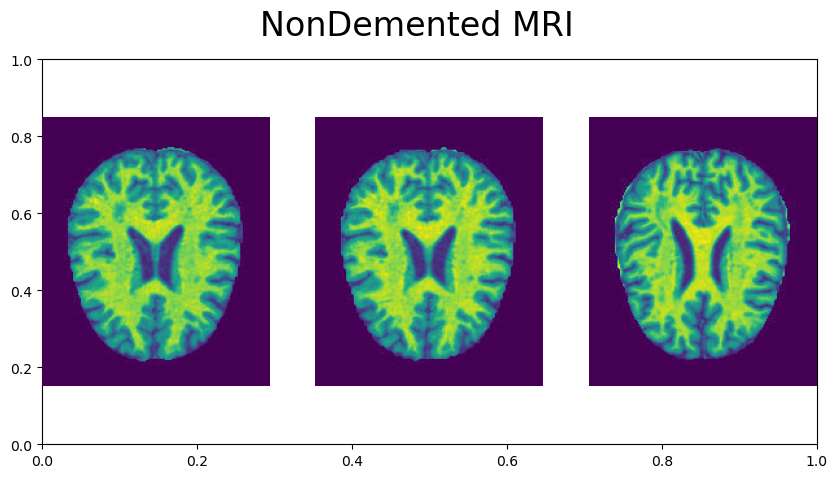

In [11]:
#Visualizing Data
#NonDemented
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('NonDemented MRI', fontsize=24)

for ind, img_src in enumerate(df_NonDemented_link[:3]):
    plt.subplot(1, 3, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

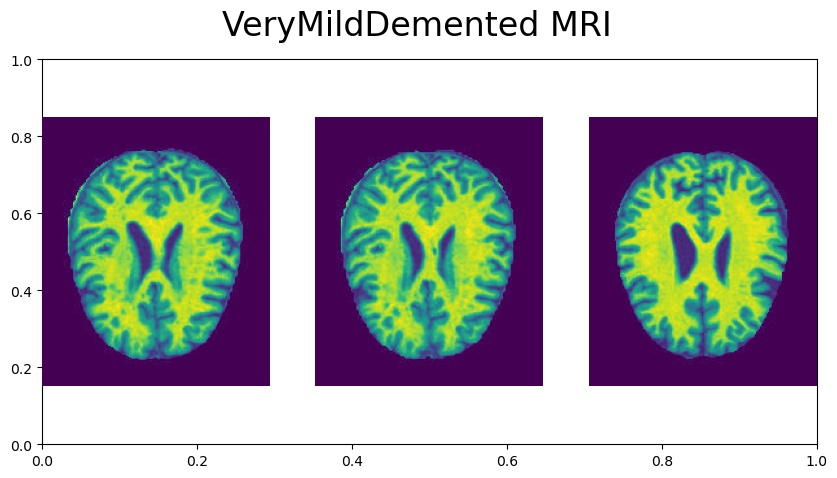

In [12]:
#VeryMildDemented
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('VeryMildDemented MRI', fontsize=24)

for ind, img_src in enumerate(df_VeryMildDemented_link[:3]):
    plt.subplot(1, 3, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

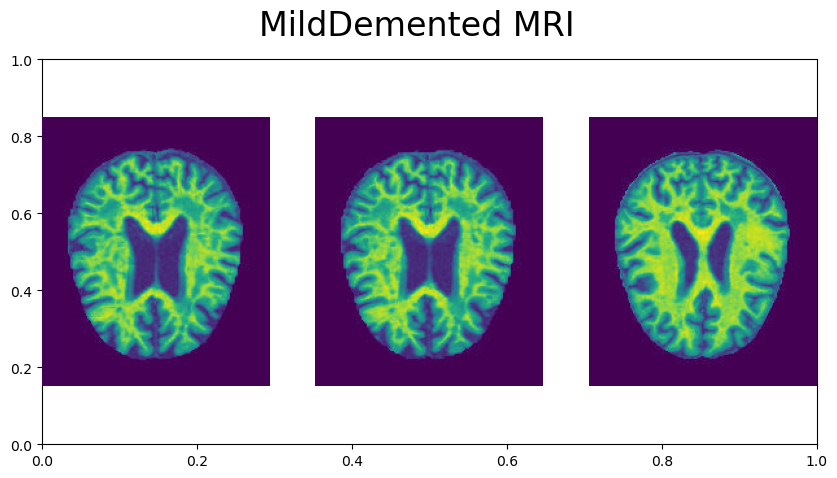

In [13]:
#MildDemented
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('MildDemented MRI', fontsize=24)

for ind, img_src in enumerate(df_MildDemented_link[1:4]):
    plt.subplot(1, 3, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

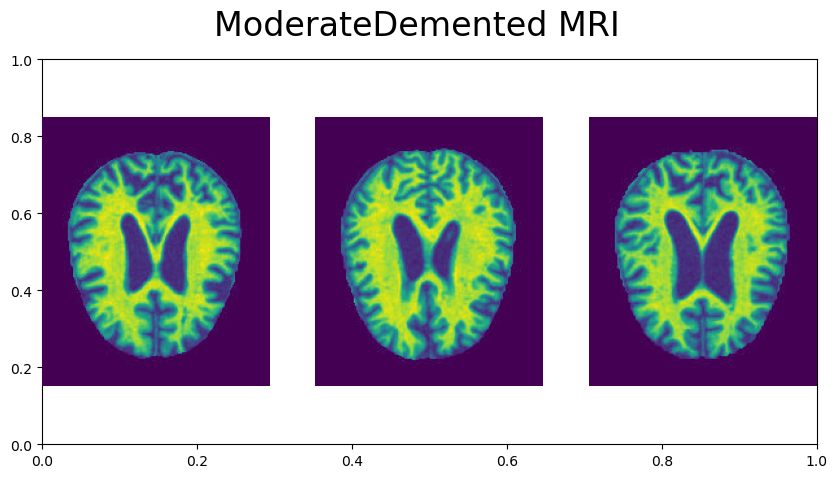

In [14]:
#MildDemented
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('ModerateDemented MRI', fontsize=24)

for ind, img_src in enumerate(df_ModerateDemented_link[:3]):
    plt.subplot(1, 3, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

# **PREPROCESSING**
**APPLYING FILTERS**

Text(0.5, 1.0, 'MEDIAN FILTER')

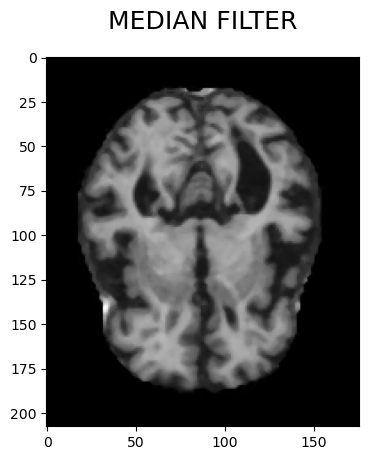

In [15]:
#MEDIAN FILTER
from PIL import Image, ImageFilter

image = Image.open(r"/Users/anushrisapate/Desktop/abc/alz/train/MildDemented/mildDem0.jpg")
image_Median = image.filter(ImageFilter.MedianFilter(size = 3))
plt.imshow(image_Median,cmap='gray')
plt.title("MEDIAN FILTER",fontsize=18,pad=20)

In [16]:
image_Median.save("/Users/anushrisapate/Desktop/abc/alz/FilterImages/Medianfilter.jpg")

In [17]:
original = cv2.imread("/Users/anushrisapate/Desktop/abc/alz/train/MildDemented/mildDem0.jpg")
MedianFilter = cv2.imread("/Users/anushrisapate/Desktop/abc/alz/FilterImages/Medianfilter.jpg", 1)

def mse(imageA, imageB):
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])

	return err

def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

MSE_score = mse(original, MedianFilter)
RMSE_score = math.sqrt(MSE_score)
PSNR_score = psnr(original, MedianFilter)
print("MSE Score: " ,MSE_score)
print("RMSE Score: " ,RMSE_score)
print("PSNR Score: " ,PSNR_score)

MSE Score:  42.50349650349651
RMSE Score:  6.519470569263773
PSNR Score:  38.45545475468536


Text(0.5, 1.0, 'GAUSSIAN FILTER')

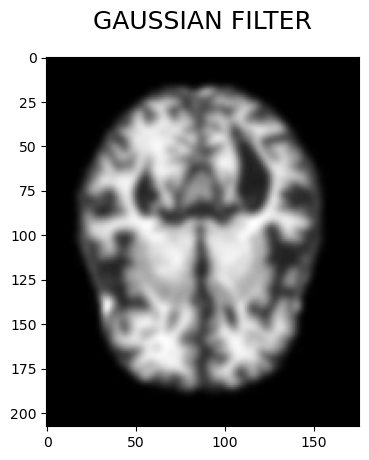

In [18]:
#GAUSSIAN
image_Gaussian = image.filter(ImageFilter.GaussianBlur)
plt.imshow(image_Gaussian,cmap='gray')
plt.title("GAUSSIAN FILTER",fontsize=18,pad=20)

In [19]:
image_Gaussian.save("/Users/anushrisapate/Desktop/a/alz/FilterImages/Gaussianfilter.jpg")

In [23]:
import cv2
import numpy as np
import math

# Load images
original = cv2.imread("/Users/anushrisapate/Desktop/abc/alz/train/MildDemented/mildDem0.jpg")
GaussianFilter = cv2.imread("/Users/anushrisapate/Desktop/abc/alz/FilterImages/Gaussianfilter.jpg", 1)

# Check if images were loaded correctly
if original is None or GaussianFilter is None:
    print("Error: One of the images was not loaded correctly.")
else:
    # Resize the images if they are not the same size
    if original.shape != GaussianFilter.shape:
        GaussianFilter = cv2.resize(GaussianFilter, (original.shape[1], original.shape[0]))

    # MSE function
    def mse(imageA, imageB):
        err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
        err /= float(imageA.shape[0] * imageA.shape[1])
        return err

    # PSNR function
    def psnr(img1, img2):
        mse_val = np.mean((img1 - img2) ** 2)
        if mse_val == 0:
            return 100
        PIXEL_MAX = 255.0
        return 20 * math.log10(PIXEL_MAX / math.sqrt(mse_val))

    # Calculate MSE, RMSE, and PSNR
    MSE_score = mse(original, GaussianFilter)
    RMSE_score = math.sqrt(MSE_score)
    PSNR_score = psnr(original, GaussianFilter)

    # Output the scores
    print("MSE Score:", MSE_score)
    print("RMSE Score:", RMSE_score)
    print("PSNR Score:", PSNR_score)


Error: One of the images was not loaded correctly.


[ WARN:0@728.791] global loadsave.cpp:241 findDecoder imread_('/Users/anushrisapate/Desktop/abc/alz/FilterImages/Gaussianfilter.jpg'): can't open/read file: check file path/integrity


Text(0.5, 1.0, 'SHARPEN FILTER')

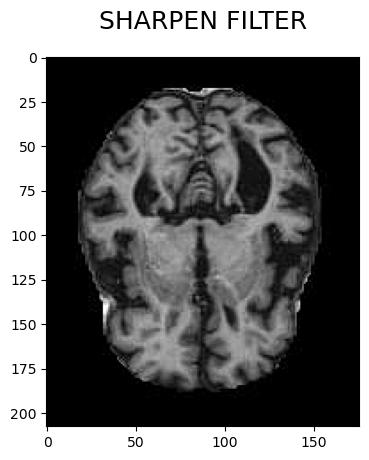

In [24]:
#SHARPEN FILTER
image_Sharpen = image.filter(ImageFilter.SHARPEN);

plt.imshow(image_Sharpen,cmap='gray')
plt.title("SHARPEN FILTER",fontsize=18,pad=20)

In [25]:
image_Sharpen.save("/Users/anushrisapate/Desktop/abc/alz/FilterImages/Sharpenfilter.jpg")

In [28]:
original = cv2.imread("/Users/anushrisapate/Desktop/abc/alz/train/MildDemented/mildDem0.jpg")
SharpenFilter = cv2.imread("/Users/anushrisapate/Desktop/abc/alz/FilterImages/Sharpenfilter.jpg", 1)

def mse(imageA, imageB):
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])

	return err

def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

MSE_score = mse(original, SharpenFilter)
RMSE_score = math.sqrt(MSE_score)
PSNR_score = psnr(original, SharpenFilter)
print("MSE Score: " ,MSE_score)
print("RMSE Score: " ,RMSE_score)
print("PSNR Score: " ,PSNR_score)

MSE Score:  83.04242242132867
RMSE Score:  9.112761514564543
PSNR Score:  35.742528012788384


Text(0.5, 1.0, 'EMBOSS FILTER')

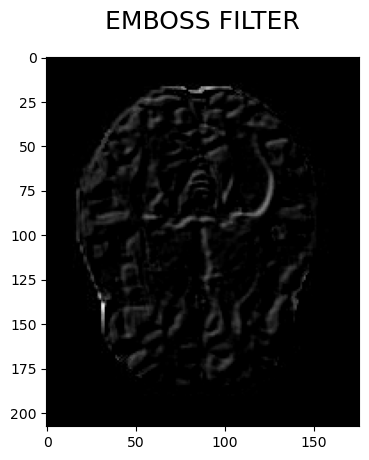

In [29]:
#EMBOSS
image1 = cv2.imread("/Users/anushrisapate/Desktop/abc/alz/train/MildDemented/mildDem0.jpg")
emboss_kernel = np.array([[-1, 0, 0],
                    [0, 0, 0],
                    [0, 0, 1]])
emboss_img = cv2.filter2D(image1, ddepth=-1, kernel=emboss_kernel)
plt.imshow(emboss_img,cmap='gray')
plt.title("EMBOSS FILTER",fontsize=18,pad=20)

In [31]:
def mse(imageA, imageB):
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])

	return err

def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

MSE_score = mse(image1, emboss_img)
RMSE_score = math.sqrt(MSE_score)
PSNR_score = psnr(image1, emboss_img)
print("MSE Score: " ,MSE_score)
print("RMSE Score: " ,RMSE_score)
print("PSNR Score: " ,PSNR_score)

MSE Score:  13237.293241914336
RMSE Score:  115.05343646286423
PSNR Score:  30.71854659914702


# **CNN WITHOUT PREPROCESSING**

In [32]:
import shutil
import matplotlib.pyplot as plt
from sklearn.utils import resample
import numpy as np
import pandas as pd
import os
from os import listdir
import keras
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.datasets import mnist
from sklearn.metrics import accuracy_score
import glob
from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping, Callback, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score

# No need to import np_utils, use to_categorical instead


In [33]:
MildDemented=glob.glob('/Users/anushrisapate/Desktop/abc/alz/train/**/MildDemented/*.jpg', recursive=True)
ModerateDemented=glob.glob('/Users/anushrisapate/Desktop/abc/alz/train/**/ModerateDemented/*.jpg', recursive=True)
NonDemented=glob.glob('/Users/anushrisapate/Desktop/abc/alz/train/**/NonDemented/*.jpg', recursive=True)
VeryMildDemented=glob.glob('/Users/anushrisapate/Desktop/abc/alz/train/**/VeryMildDemented/*.jpg', recursive=True)

In [34]:
Imagedata = pd.DataFrame(index=np.arange(0, len(MildDemented)+len(ModerateDemented)+len(NonDemented)+len(VeryMildDemented)), columns=["image", "target"])
k=0
for c in [0,1,2,3]:
        if c==0:
            for m in range(len(MildDemented)):
                Imagedata.iloc[k]["image"] = MildDemented[m]
                Imagedata.iloc[k]["target"] = 0
                k += 1
        elif c==1:
            for m in range(len(ModerateDemented)):
                Imagedata.iloc[k]["image"] = ModerateDemented[m]
                Imagedata.iloc[k]["target"] = 1
                k += 1
        elif c==2:
             for m in range(len(NonDemented)):
                Imagedata.iloc[k]["image"] = NonDemented[m]
                Imagedata.iloc[k]["target"] = 2
                k += 1
        else:
          for m in range(len(VeryMildDemented)):
            Imagedata.iloc[k]["image"]=VeryMildDemented[m]
            Imagedata.iloc[k]["target"]=3
            k +=1


/var/folders/wv/l2hm1j291j99fw3_373s3kj40000gn/T/ipykernel_7550/2108758194.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Imagedata.iloc[k]["image"] = MildDemented[m]
/var/folders/wv/l2hm1j291j99fw3_373s3kj40000gn/T/ipykernel_7550/21087

In [35]:
train_image = []
y = []

for i in tqdm(range(Imagedata.shape[0])):
    # Remove the 'grayscale' argument and replace it with 'color_mode'
    img = image.load_img(Imagedata['image'].iloc[i], target_size=(75, 75), color_mode='rgb')  # Use 'grayscale' if you want grayscale images
    img = image.img_to_array(img)
    img = img / 255.0  # Normalize the image pixels
    train_image.append(img)

X = np.array(train_image)
y = Imagedata.iloc[:, -1].values

# Split the data into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=42, test_size=0.2, shuffle=True)

# Convert labels to categorical (one-hot encoding)
Y_train = to_categorical(y_train, 4)  # Using 'to_categorical' as suggested in the previous corrections
Y_test = to_categorical(y_test, 4)
Y_val = to_categorical(y_val, 4)

# Check the shapes of the datasets
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


100%|██████████| 5245/5245 [00:05<00:00, 948.57it/s] 


(4196, 75, 75, 3)
(839, 75, 75, 3)
(210, 75, 75, 3)


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(75, 75, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Changed pool_size from (1,1) to (2,2) for MaxPooling

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, Y_train, batch_size=10, epochs=25, validation_data=(X_val, Y_val))


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 58s 123ms/step - accuracy: 0.4677 - loss: 1.1009 - val_accuracy: 0.4857 - val_loss: 1.0221
Epoch 2/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 81s 121ms/step - accuracy: 0.5258 - loss: 0.9929 - val_accuracy: 0.5952 - val_loss: 0.8711
Epoch 3/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 49s 116ms/step - accuracy: 0.5453 - loss: 0.9082 - val_accuracy: 0.6190 - val_loss: 0.7956
Epoch 4/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 48s 115ms/step - accuracy: 0.5967 - loss: 0.8291 - val_accuracy: 0.6714 - val_loss: 0.7220
Epoch 5/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 65s 154ms/step - accuracy: 0.6272 - loss: 0.7520 - val_accuracy: 0.7048 - val_loss: 0.6491
Epoch 6/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 62s 147ms/step - accuracy: 0.6588 - loss: 0.7044 - val_accuracy: 0.7381 - val_loss: 0.5620
Epoch 7/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 59s 140ms/step - accuracy: 0.7181 - loss: 0.5870 - val_accuracy: 0.7429 - val_loss: 0.5563
Epoch 8/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 50s 118ms/step - accuracy: 0.7565 - loss: 0

<Axes: >

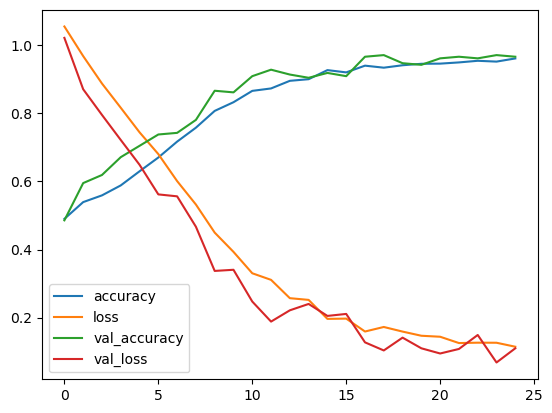

In [37]:
history_df = pd.DataFrame(history.history)
history_df.plot()

In [38]:
model.evaluate(X_test, Y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.9560 - loss: 0.1363


[0.1503954380750656, 0.9499403834342957]

In [39]:
pred = model.predict(X_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step


In [40]:
print('Model Accuracy score', accuracy_score(np.argmax(pred, axis=1), np.argmax(Y_test, axis=1)))

Model Accuracy score 0.9499404052443385


In [41]:
preds = np.argmax(pred, axis=1)
actual_label = np.argmax(Y_test, axis=1)
print(classification_report(actual_label, preds))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       139
           1       0.93      0.93      0.93        15
           2       0.96      0.98      0.97       384
           3       0.97      0.91      0.94       301

    accuracy                           0.95       839
   macro avg       0.94      0.95      0.94       839
weighted avg       0.95      0.95      0.95       839



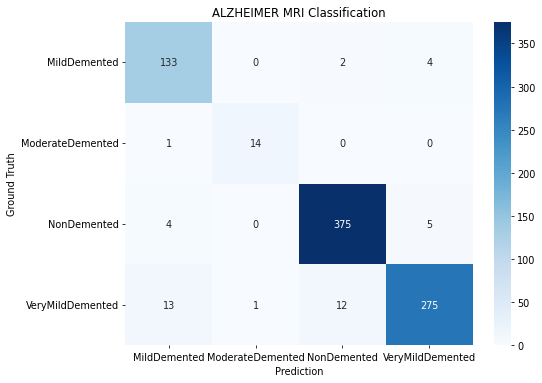

In [42]:
labels=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
cnf = confusion_matrix(actual_label, preds)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('ALZHEIMER MRI Classification')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

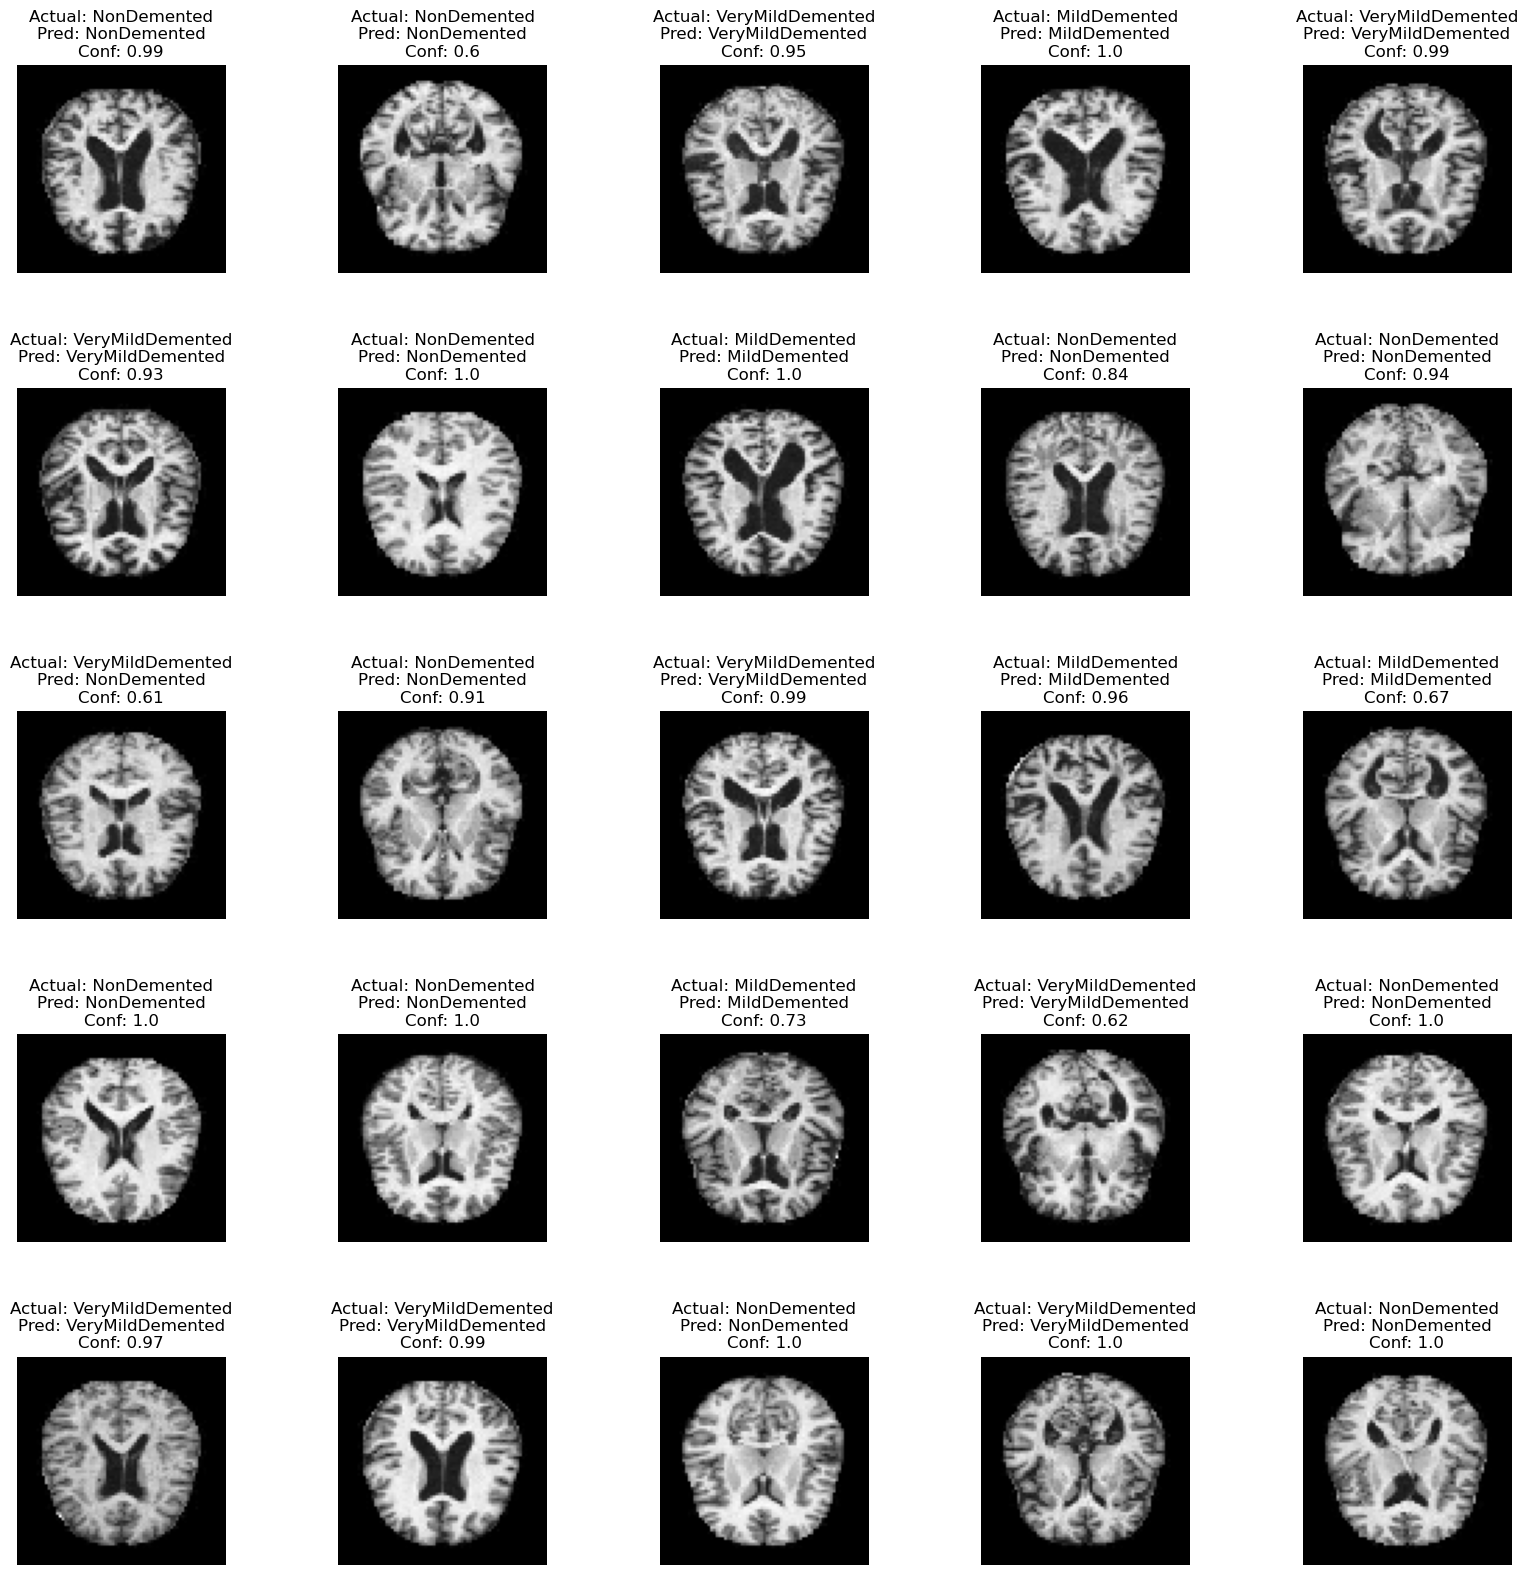

In [43]:
grid_width = 5
grid_height = 5
f, ax = plt.subplots(grid_width, grid_height)
f.set_size_inches(15, 15)

img_idx = 0
for i in range(0, grid_width):
    for j in range(0, grid_height):
        actual = actual_label[img_idx]
        predicted = preds[img_idx]
        confidence = round(pred[img_idx][predicted], 2)
        ax[i][j].axis('off')
        ax[i][j].set_title('Actual: '+labels[actual]+'\nPred: '+labels[predicted] + '\nConf: ' +str(confidence))
        ax[i][j].imshow(X_test[img_idx])
        img_idx += 1

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.5, hspace=0.55)

# **CNN WITH PREPROCESSING [MEDIAN FILTER AND DATA AUGUMENTATION]**

In [44]:
image_no1 = 1
for i in MildDemented:
    with open(i,"rb") as file:
        img = Image.open(file)
        image_Median = img.filter(ImageFilter.MedianFilter(size = 3))
        name = '/Users/anushrisapate/Desktop/abc/alz/train/MildDemented/Median_' + str(image_no1) + '.jpg'
        image_Median.save(name, 'PNG')
        image_no1 += 1

In [45]:
image_no1 = 1
for i in ModerateDemented:
    with open(i,"rb") as file:
        img = Image.open(file)
        image_Median = img.filter(ImageFilter.MedianFilter(size = 3))
        name = '/Users/anushrisapate/Desktop/abc/alz/train/ModerateDemented/Median_' + str(image_no1) + '.jpg'
        image_Median.save(name, 'PNG')
        image_no1 += 1

In [46]:
image_no1 = 1
for i in NonDemented:
    with open(i,"rb") as file:
        img = Image.open(file)
        image_Median = img.filter(ImageFilter.MedianFilter(size = 3))
        name = '/Users/anushrisapate/Desktop/abc/alz/train/NonDemented/Median_' + str(image_no1) + '.jpg'
        image_Median.save(name, 'PNG')
        image_no1 += 1

In [47]:
image_no1 = 1
for i in VeryMildDemented:
    with open(i,"rb") as file:
        img = Image.open(file)
        image_Median = img.filter(ImageFilter.MedianFilter(size = 3))
        name = '/Users/anushrisapate/Desktop/abc/alz/train/VeryMildDemented/Median_' + str(image_no1) + '.jpg'
        image_Median.save(name, 'PNG')
        image_no1 += 1

In [48]:
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = list()
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)

    return allFiles

In [49]:
MildDemented_Median=getListOfFiles('/Users/anushrisapate/Desktop/abc/alz/train/MildDemented')
ModerateDemented_Median=getListOfFiles('/Users/anushrisapate/Desktop/abc/alz/train/ModerateDemented')
NonDemented_Median=getListOfFiles('/Users/anushrisapate/Desktop/abc/alz/train/NonDemented')
VeryMildDemented_Median=getListOfFiles('/Users/anushrisapate/Desktop/abc/alz/train/VeryMildDemented')

In [50]:
Imagedata = pd.DataFrame(index=np.arange(0, len(MildDemented_Median)+len(ModerateDemented_Median)+len(NonDemented_Median)+len(VeryMildDemented_Median)), columns=["image", "target"])
k=0
for c in [0,1,2,3]:
        if c==0:
            for m in range(len(MildDemented_Median)):
                Imagedata.iloc[k]["image"] = MildDemented_Median[m]
                Imagedata.iloc[k]["target"] = 0
                k += 1
        elif c==1:
            for m in range(len(ModerateDemented_Median)):
                Imagedata.iloc[k]["image"] = ModerateDemented_Median[m]
                Imagedata.iloc[k]["target"] = 1
                k += 1
        elif c==2:
             for m in range(len(NonDemented_Median)):
                Imagedata.iloc[k]["image"] = NonDemented_Median[m]
                Imagedata.iloc[k]["target"] = 2
                k += 1
        else:
          for m in range(len(VeryMildDemented_Median)):
            Imagedata.iloc[k]["image"]=VeryMildDemented_Median[m]
            Imagedata.iloc[k]["target"]=3
            k +=1

/var/folders/wv/l2hm1j291j99fw3_373s3kj40000gn/T/ipykernel_7550/1599652752.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Imagedata.iloc[k]["image"] = MildDemented_Median[m]
/var/folders/wv/l2hm1j291j99fw3_373s3kj40000gn/T/ipykernel_755

In [51]:
datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False,
                             rotation_range=90,
                             zoom_range = 0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=True)

In [52]:
from tensorflow.keras.preprocessing import image
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras.utils import to_categorical  # Changed this line

train_image = []
y = []

# Load images
for i in tqdm(range(Imagedata.shape[0])):
    img_path = Imagedata['image'].iloc[i]
    try:
        # Use color_mode to specify grayscale
        img = image.load_img(img_path, target_size=(75, 75), color_mode='rgb')  # Use 'grayscale' if needed
        img = image.img_to_array(img)
        img = img / 255.0
        train_image.append(img)
        y.append(Imagedata.iloc[i, -1])  # Collect corresponding labels
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")

X = np.array(train_image)
y = np.array(y)

# Check if X and y have been populated
if X.shape[0] == 0 or y.shape[0] == 0:
    raise ValueError("No images were loaded. Check the image paths in Imagedata.")

# Proceed to split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=42, test_size=0.2, shuffle=True)

Y_train = to_categorical(y_train, 4)  # Changed this line
Y_test = to_categorical(y_test, 4)    # Changed this line
Y_val = to_categorical(y_val, 4)      # Changed this line

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


100%|██████████| 17134/17134 [01:21<00:00, 211.22it/s] 


(13707, 75, 75, 3)
(2741, 75, 75, 3)
(686, 75, 75, 3)


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a Sequential model
model = Sequential()

# First convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(75, 75, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Changed from MaxPool2D to MaxPooling2D

# Second convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Fourth convolutional layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Assuming datagen is defined somewhere in your code
history = model.fit(datagen.flow(X_train, Y_train), batch_size=10, epochs=25, validation_data=(X_val, Y_val))


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
429/429 ━━━━━━━━━━━━━━━━━━━━ 174s 388ms/step - accuracy: 0.6052 - loss: 0.8136 - val_accuracy: 0.6574 - val_loss: 0.6863
Epoch 2/25
429/429 ━━━━━━━━━━━━━━━━━━━━ 167s 388ms/step - accuracy: 0.6768 - loss: 0.6603 - val_accuracy: 0.6910 - val_loss: 0.6446
Epoch 3/25
429/429 ━━━━━━━━━━━━━━━━━━━━ 150s 350ms/step - accuracy: 0.6880 - loss: 0.6465 - val_accuracy: 0.7099 - val_loss: 0.6250
Epoch 4/25
429/429 ━━━━━━━━━━━━━━━━━━━━ 168s 393ms/step - accuracy: 0.7063 - loss: 0.6182 - val_accuracy: 0.7259 - val_loss: 0.5920
Epoch 5/25
429/429 ━━━━━━━━━━━━━━━━━━━━ 182s 425ms/step - accuracy: 0.7101 - loss: 0.6040 - val_accuracy: 0.7157 - val_loss: 0.6342
Epoch 6/25
429/429 ━━━━━━━━━━━━━━━━━━━━ 165s 384ms/step - accuracy: 0.7116 - loss: 0.5903 - val_accuracy: 0.7405 - val_loss: 0.5551
Epoch 7/25
429/429 ━━━━━━━━━━━━━━━━━━━━ 170s 397ms/step - accuracy: 0.7156 - loss: 0.5860 - val_accuracy: 0.7099 - val_loss: 0.6481
Epoch 8/25
429/429 ━━━━━━━━━━━━━━━━━━━━ 152s 354ms/step - accuracy: 0.7215 -

<Axes: >

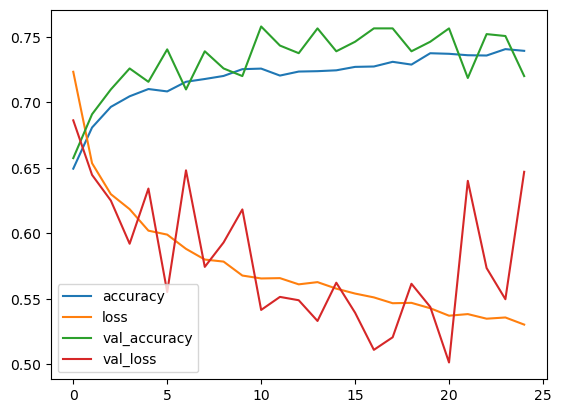

In [54]:
history_df = pd.DataFrame(history.history)
history_df.plot()

In [55]:
model.evaluate(X_test, Y_test)

86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 146ms/step - accuracy: 0.7250 - loss: 0.6335


[0.6641615629196167, 0.7037577629089355]

In [56]:
pred = model.predict(X_test)

86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step


In [57]:
print('Model Accuracy score', accuracy_score(np.argmax(pred, axis=1), np.argmax(Y_test, axis=1)))

Model Accuracy score 0.70375775264502


In [58]:
preds = np.argmax(pred, axis=1)
actual_label = np.argmax(Y_test, axis=1)
print(classification_report(actual_label, preds))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1025
           1       1.00      0.54      0.70       286
           2       0.66      0.80      0.72       845
           3       0.46      0.50      0.48       585

    accuracy                           0.70      2741
   macro avg       0.75      0.66      0.68      2741
weighted avg       0.73      0.70      0.71      2741



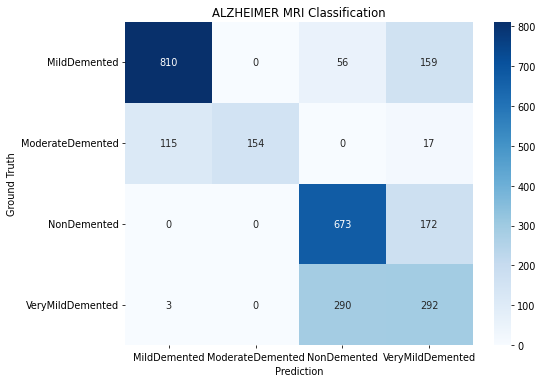

In [59]:
labels=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
cnf = confusion_matrix(actual_label, preds)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('ALZHEIMER MRI Classification')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

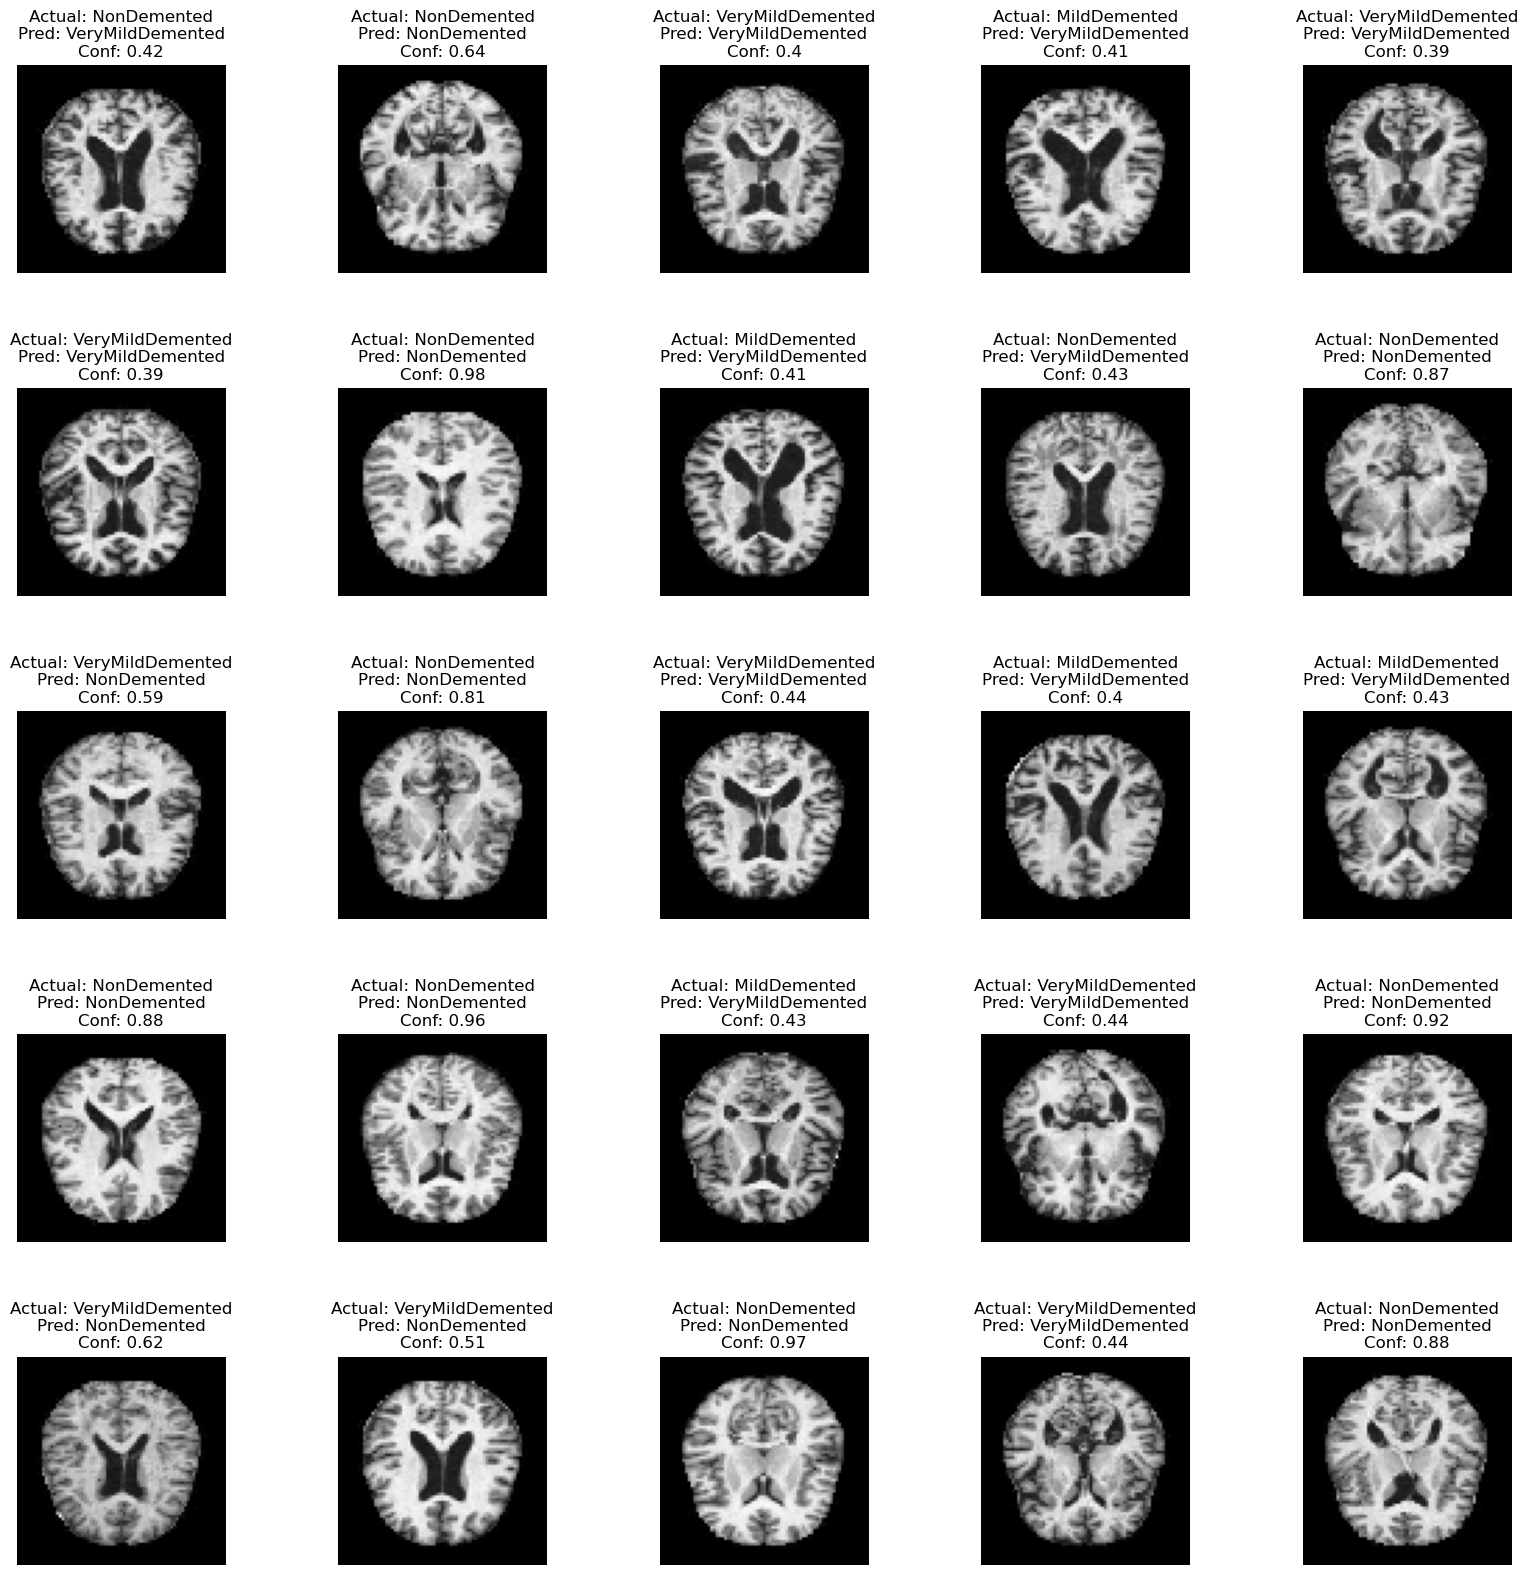

In [121]:
grid_width = 5
grid_height = 5
f, ax = plt.subplots(grid_width, grid_height)
f.set_size_inches(15, 15)

img_idx = 0
for i in range(0, grid_width):
    for j in range(0, grid_height):
        actual = actual_label[img_idx]
        predicted = preds[img_idx]
        confidence = round(pred[img_idx][predicted], 2)
        ax[i][j].axis('off')
        ax[i][j].set_title('Actual: '+labels[actual]+'\nPred: '+labels[predicted] + '\nConf: ' +str(confidence))
        ax[i][j].imshow(X_test[img_idx])
        img_idx += 1

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.5, hspace=0.55)

# **CNN WITH PREPROCESSING [MEDIAN FILTER]**

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(75,75,3)))
model.add(MaxPooling2D(pool_size=(1,1)))  # Corrected to MaxPooling2D

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, Y_train, batch_size=10, epochs=25, validation_data=(X_val, Y_val))


Epoch 1/25
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 623s 450ms/step - accuracy: 0.6651 - loss: 0.7066 - val_accuracy: 0.7784 - val_loss: 0.5233
Epoch 2/25
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 425s 310ms/step - accuracy: 0.7636 - loss: 0.5103 - val_accuracy: 0.8455 - val_loss: 0.3626
Epoch 3/25
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 596s 435ms/step - accuracy: 0.8291 - loss: 0.3823 - val_accuracy: 0.9111 - val_loss: 0.2241
Epoch 4/25
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 549s 401ms/step - accuracy: 0.8911 - loss: 0.2590 - val_accuracy: 0.9534 - val_loss: 0.1318
Epoch 5/25
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 653s 475ms/step - accuracy: 0.9405 - loss: 0.1507 - val_accuracy: 0.9636 - val_loss: 0.0884
Epoch 6/25
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 729s 532ms/step - accuracy: 0.9608 - loss: 0.1061 - val_accuracy: 0.9767 - val_loss: 0.0566
Epoch 7/25
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 433s 316ms/step - accuracy: 0.9687 - loss: 0.0861 - val_accuracy: 0.9869 - val_loss: 0.0418
Epoch 8/25
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 456s 332ms/step - ac

Text(0.5, 1.0, 'CNN WITH MEDIAN FILTER')

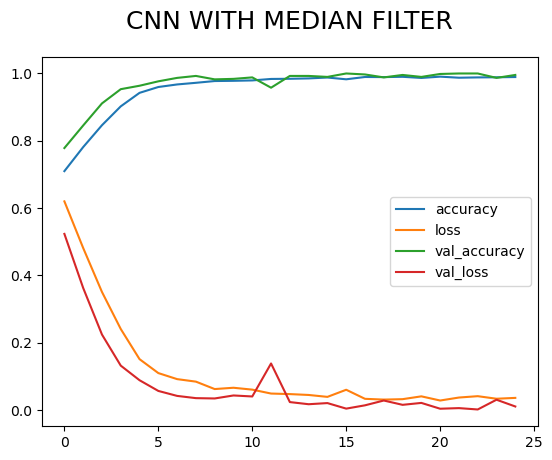

In [63]:
history_df = pd.DataFrame(history.history)
history_df.plot()
plt.title("CNN WITH MEDIAN FILTER",fontsize=18,pad=20)

In [64]:
model.evaluate(X_test, Y_test)

86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 138ms/step - accuracy: 0.9989 - loss: 0.0076


[0.007812553085386753, 0.9989054799079895]

In [65]:
pred = model.predict(X_test)

86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 149ms/step


In [66]:
print('Model Accuracy score', accuracy_score(np.argmax(pred, axis=1), np.argmax(Y_test, axis=1)))

Model Accuracy score 0.9989055089383436


Text(0.5, 1.0, 'CNN WITH MEDIAN FILTER')

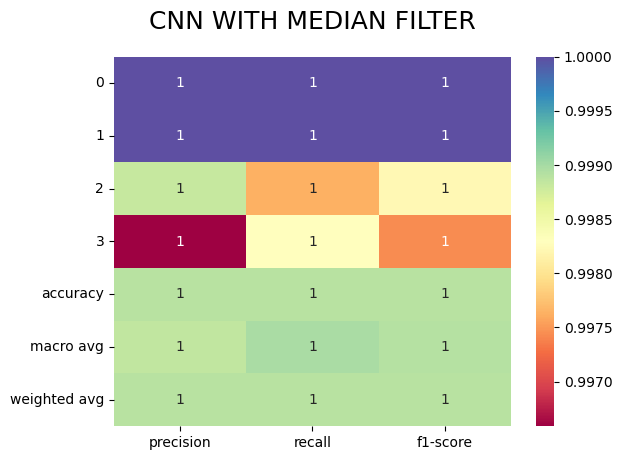

In [67]:
import seaborn as sns
preds = np.argmax(pred, axis=1)
actual_label = np.argmax(Y_test, axis=1)
clf_report =classification_report(actual_label, preds,output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True,cmap="Spectral")
plt.title("CNN WITH MEDIAN FILTER",fontsize=18,pad=20)

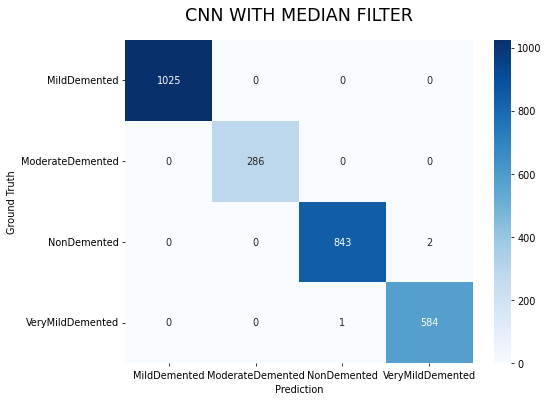

In [68]:
labels=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
cnf = confusion_matrix(actual_label, preds)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title("CNN WITH MEDIAN FILTER",fontsize=18,pad=20)
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

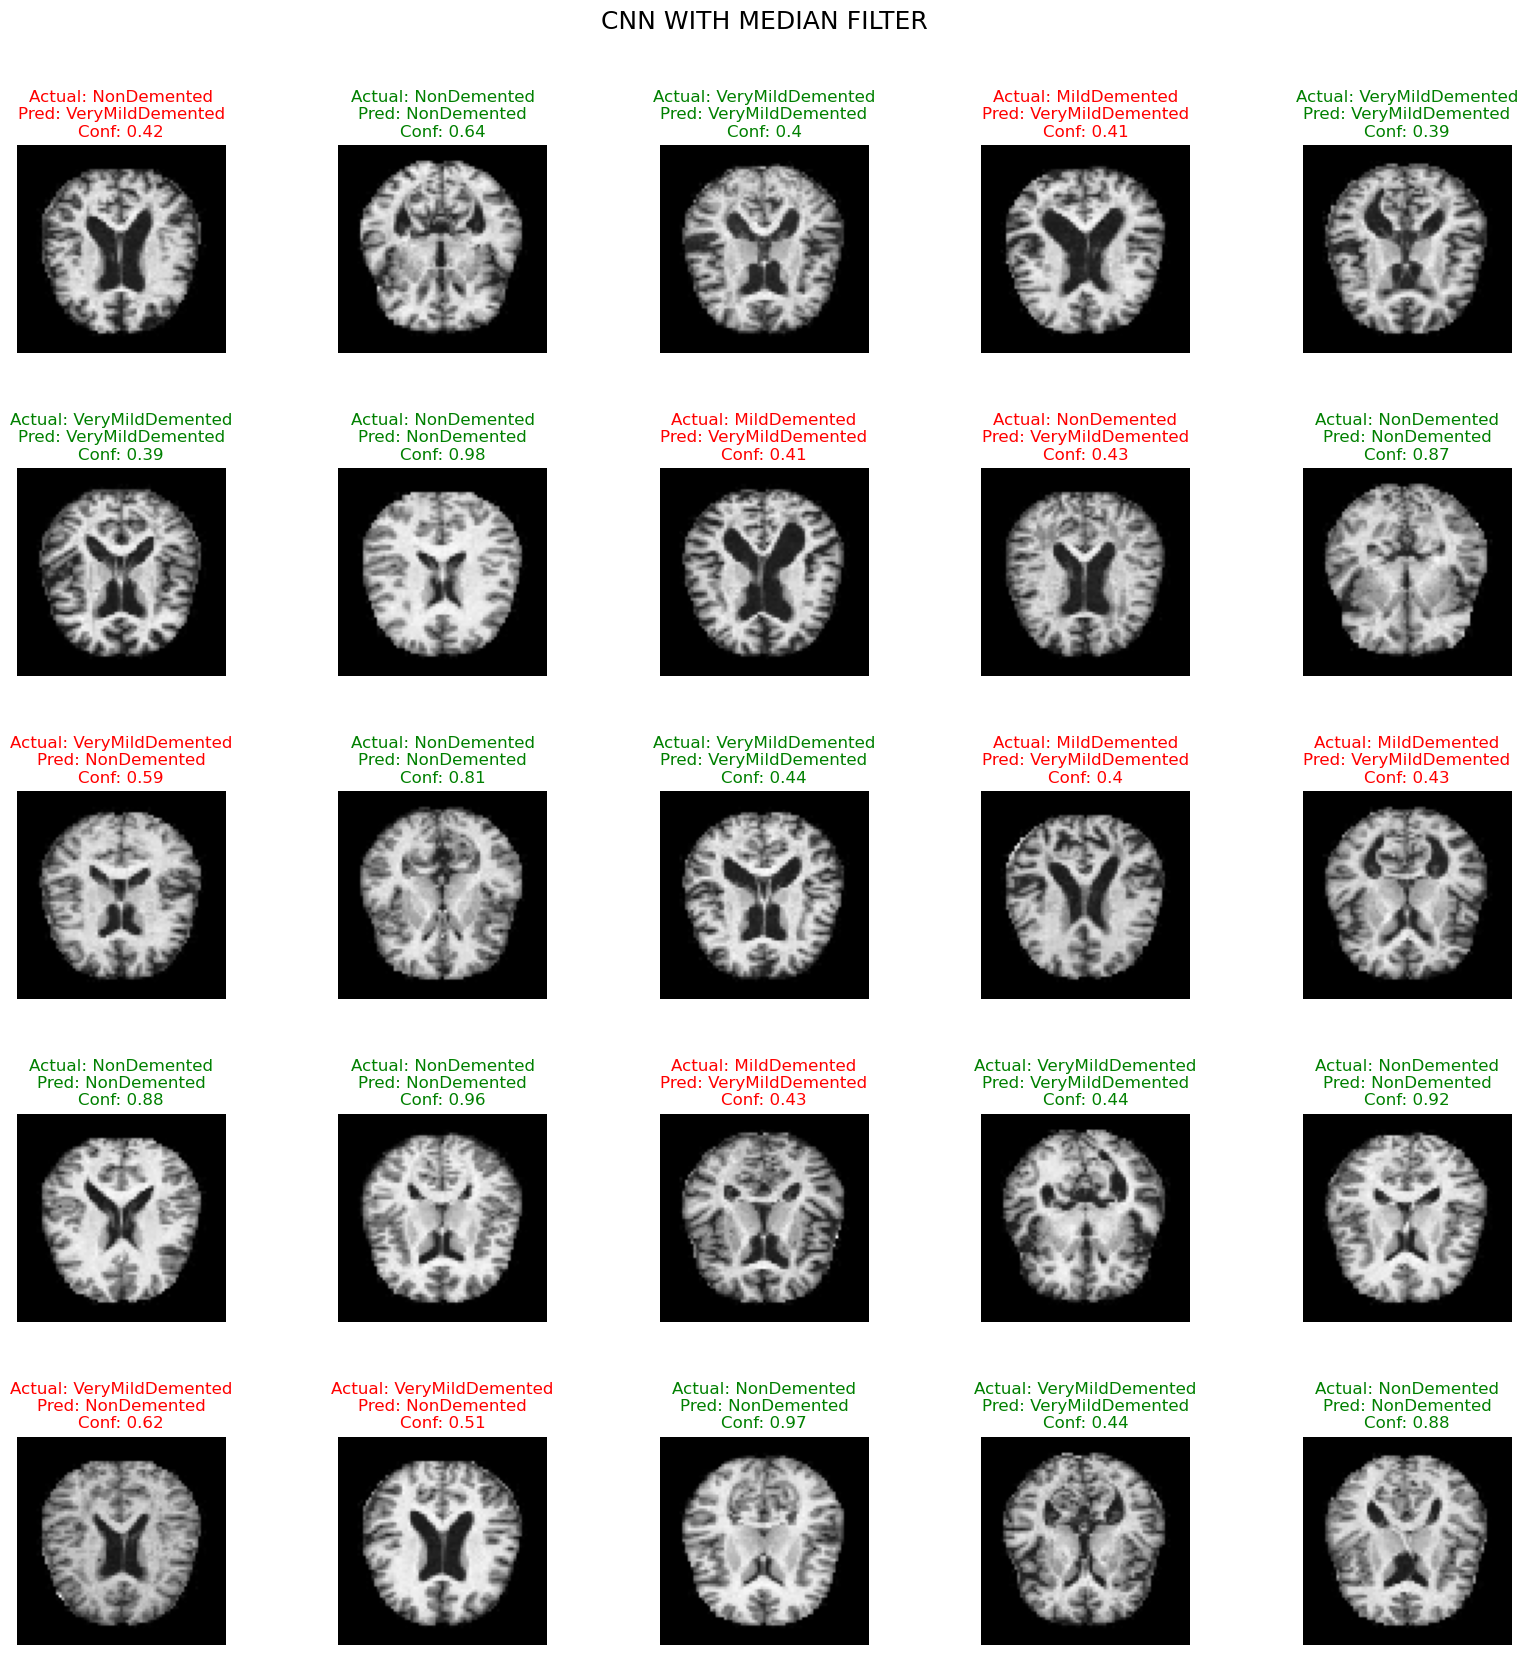

In [122]:
grid_width = 5
grid_height = 5
f, ax = plt.subplots(grid_width, grid_height)
f.set_size_inches(15, 15)

img_idx = 0
for i in range(0, grid_width):
    for j in range(0, grid_height):
        actual = actual_label[img_idx]
        predicted = preds[img_idx]
        confidence = round(pred[img_idx][predicted], 2)
        ax[i][j].axis('off')
        if(labels[actual]==labels[predicted]):
           ax[i][j].set_title('Actual: '+labels[actual]+'\nPred: '+labels[predicted] + '\nConf: ' +str(confidence),color='green')
        else:
          ax[i][j].set_title('Actual: '+labels[actual]+'\nPred: '+labels[predicted] + '\nConf: ' +str(confidence),color='red')

        ax[i][j].imshow(X_test[img_idx])
        img_idx += 1
f.suptitle("CNN WITH MEDIAN FILTER",fontsize=18,y=1.09)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.5, hspace=0.55)

# **CNN WITH PREPROCESSING [GAUSSIAN FILTER AND DATA AUGUMENTATION]**

In [73]:
image_no1 = 1
for i in MildDemented:
    with open(i,"rb") as file:
        img = Image.open(file)
        image_Gaussian = img.filter(ImageFilter.GaussianBlur)
        name = '/Users/anushrisapate/Desktop/abc/alz/Data_Gaussian/MildDemented/Gaussian_' + str(image_no1) + '.jpg'
        image_Gaussian.save(name, 'PNG')
        image_no1 += 1

In [74]:
image_no1 = 1
for i in ModerateDemented:
    with open(i,"rb") as file:
        img = Image.open(file)
        image_Gaussian = img.filter(ImageFilter.GaussianBlur)
        name = '/Users/anushrisapate/Desktop/abc/alz/Data_Gaussian/ModerateDemented/Gaussian_' + str(image_no1) + '.jpg'
        image_Gaussian.save(name, 'PNG')
        image_no1 += 1

In [75]:
image_no1 = 1
for i in NonDemented:
    with open(i,"rb") as file:
        img = Image.open(file)
        image_Gaussian = img.filter(ImageFilter.GaussianBlur)
        name = '/Users/anushrisapate/Desktop/abc/alz/Data_Gaussian/NonDemented/Gaussian_' + str(image_no1) + '.jpg'
        image_Gaussian.save(name, 'PNG')
        image_no1 += 1

In [76]:
image_no1 = 1
for i in VeryMildDemented:
    with open(i,"rb") as file:
        img = Image.open(file)
        image_Gaussian = img.filter(ImageFilter.GaussianBlur)
        name = '/Users/anushrisapate/Desktop/abc/alz/Data_Gaussian/VeryMildDemented/Gaussian_' + str(image_no1) + '.jpg'
        image_Gaussian.save(name, 'PNG')
        image_no1 += 1

In [77]:
MildDemented_Gaussian=getListOfFiles('/Users/anushrisapate/Desktop/abc/alz/Data_Gaussian/MildDemented')
ModerateDemented_Gaussian=getListOfFiles('/Users/anushrisapate/Desktop/abc/alz/Data_Gaussian/ModerateDemented')
NonDemented_Gaussian=getListOfFiles('/Users/anushrisapate/Desktop/abc/alz/Data_Gaussian/NonDemented')
VeryMildDemented_Gaussian=getListOfFiles('/Users/anushrisapate/Desktop/abc/alz/Data_Gaussian/VeryMildDemented')

In [78]:
Imagedata = pd.DataFrame(index=np.arange(0, len(MildDemented_Gaussian)+len(ModerateDemented_Gaussian)+len(NonDemented_Gaussian)+len(VeryMildDemented_Gaussian)), columns=["image", "target"])
k=0
for c in [0,1,2,3]:
        if c==0:
            for m in range(len(MildDemented_Gaussian)):
                Imagedata.iloc[k]["image"] = MildDemented_Gaussian[m]
                Imagedata.iloc[k]["target"] = 0
                k += 1
        elif c==1:
            for m in range(len(ModerateDemented_Gaussian)):
                Imagedata.iloc[k]["image"] = ModerateDemented_Gaussian[m]
                Imagedata.iloc[k]["target"] = 1
                k += 1
        elif c==2:
             for m in range(len(NonDemented_Gaussian)):
                Imagedata.iloc[k]["image"] = NonDemented_Gaussian[m]
                Imagedata.iloc[k]["target"] = 2
                k += 1
        else:
          for m in range(len(VeryMildDemented_Gaussian)):
            Imagedata.iloc[k]["image"]=VeryMildDemented_Gaussian[m]
            Imagedata.iloc[k]["target"]=3
            k +=1

/var/folders/wv/l2hm1j291j99fw3_373s3kj40000gn/T/ipykernel_7550/2194726980.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Imagedata.iloc[k]["image"] = MildDemented_Gaussian[m]
/var/folders/wv/l2hm1j291j99fw3_373s3kj40000gn/T/ipykernel_7

In [79]:
datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False,
                             rotation_range=90,
                             zoom_range = 0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=True)

In [84]:
from keras.utils import to_categorical  # Use to_categorical directly

train_image = []
y = []

for i in tqdm(range(Imagedata.shape[0])):
    # Use 'color_mode' instead of 'grayscale'
    img = image.load_img(Imagedata['image'].iloc[i], target_size=(75, 75), color_mode='rgb')
    img = image.img_to_array(img)
    img = img / 255.0  # Normalize pixel values to [0, 1]
    train_image.append(img)

# Convert list to numpy array
X = np.array(train_image)

# Extract labels
y = Imagedata.iloc[:, -1].values

# Split the data into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=42, test_size=0.2, shuffle=True)

# One-hot encode the labels
Y_train = to_categorical(y_train, 4)
Y_test = to_categorical(y_test, 4)
Y_val = to_categorical(y_val, 4)

# Print the shapes of the resulting arrays
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


100%|██████████| 5245/5245 [00:04<00:00, 1218.91it/s]


(4196, 75, 75, 3)
(839, 75, 75, 3)
(210, 75, 75, 3)


In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Define the model
model = Sequential()

# Add convolutional and pooling layers
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(75,75,3)))
model.add(MaxPooling2D(pool_size=(1,1)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Flatten the output and add fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Assuming you have a data generator for image augmentation
datagen = ImageDataGenerator()  # Add appropriate parameters if needed

# Train the model
history = model.fit(datagen.flow(X_train, Y_train, batch_size=10), epochs=25, validation_data=(X_val, Y_val))



Epoch 1/25


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


420/420 ━━━━━━━━━━━━━━━━━━━━ 91s 213ms/step - accuracy: 0.4914 - loss: 1.0882 - val_accuracy: 0.5286 - val_loss: 1.0843
Epoch 2/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 75s 178ms/step - accuracy: 0.5329 - loss: 0.9847 - val_accuracy: 0.5571 - val_loss: 0.8983
Epoch 3/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 97s 230ms/step - accuracy: 0.5783 - loss: 0.8746 - val_accuracy: 0.6333 - val_loss: 0.7966
Epoch 4/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 87s 208ms/step - accuracy: 0.6215 - loss: 0.8094 - val_accuracy: 0.7048 - val_loss: 0.6784
Epoch 5/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 94s 223ms/step - accuracy: 0.6767 - loss: 0.7044 - val_accuracy: 0.7190 - val_loss: 0.6682
Epoch 6/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 128s 306ms/step - accuracy: 0.7070 - loss: 0.6226 - val_accuracy: 0.7143 - val_loss: 0.6534
Epoch 7/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 151s 360ms/step - accuracy: 0.7574 - loss: 0.5547 - val_accuracy: 0.7952 - val_loss: 0.4784
Epoch 8/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 131s 311ms/step - accuracy: 0.8012 - loss: 0.4591 - 

<Axes: >

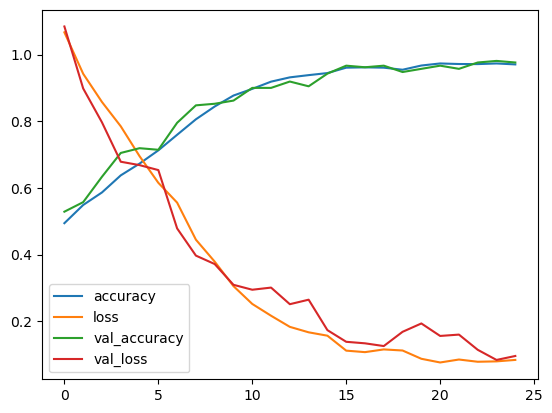

In [90]:
history_df = pd.DataFrame(history.history)
history_df.plot()

In [91]:
model.evaluate(X_test, Y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 397ms/step - accuracy: 0.9807 - loss: 0.0545


[0.06294893473386765, 0.9785459041595459]

In [92]:
pred = model.predict(X_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 363ms/step


In [93]:
print('Model Accuracy score', accuracy_score(np.argmax(pred, axis=1), np.argmax(Y_test, axis=1)))

Model Accuracy score 0.9785458879618594


In [94]:
preds = np.argmax(pred, axis=1)
actual_label = np.argmax(Y_test, axis=1)
print(classification_report(actual_label, preds))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       139
           1       1.00      1.00      1.00        15
           2       1.00      0.97      0.98       384
           3       0.96      1.00      0.98       301

    accuracy                           0.98       839
   macro avg       0.98      0.98      0.98       839
weighted avg       0.98      0.98      0.98       839



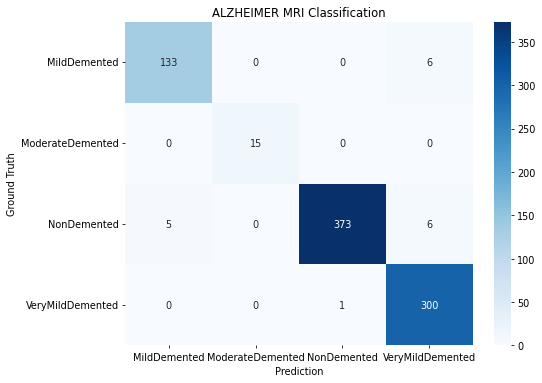

In [95]:
labels=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
cnf = confusion_matrix(actual_label, preds)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('ALZHEIMER MRI Classification')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

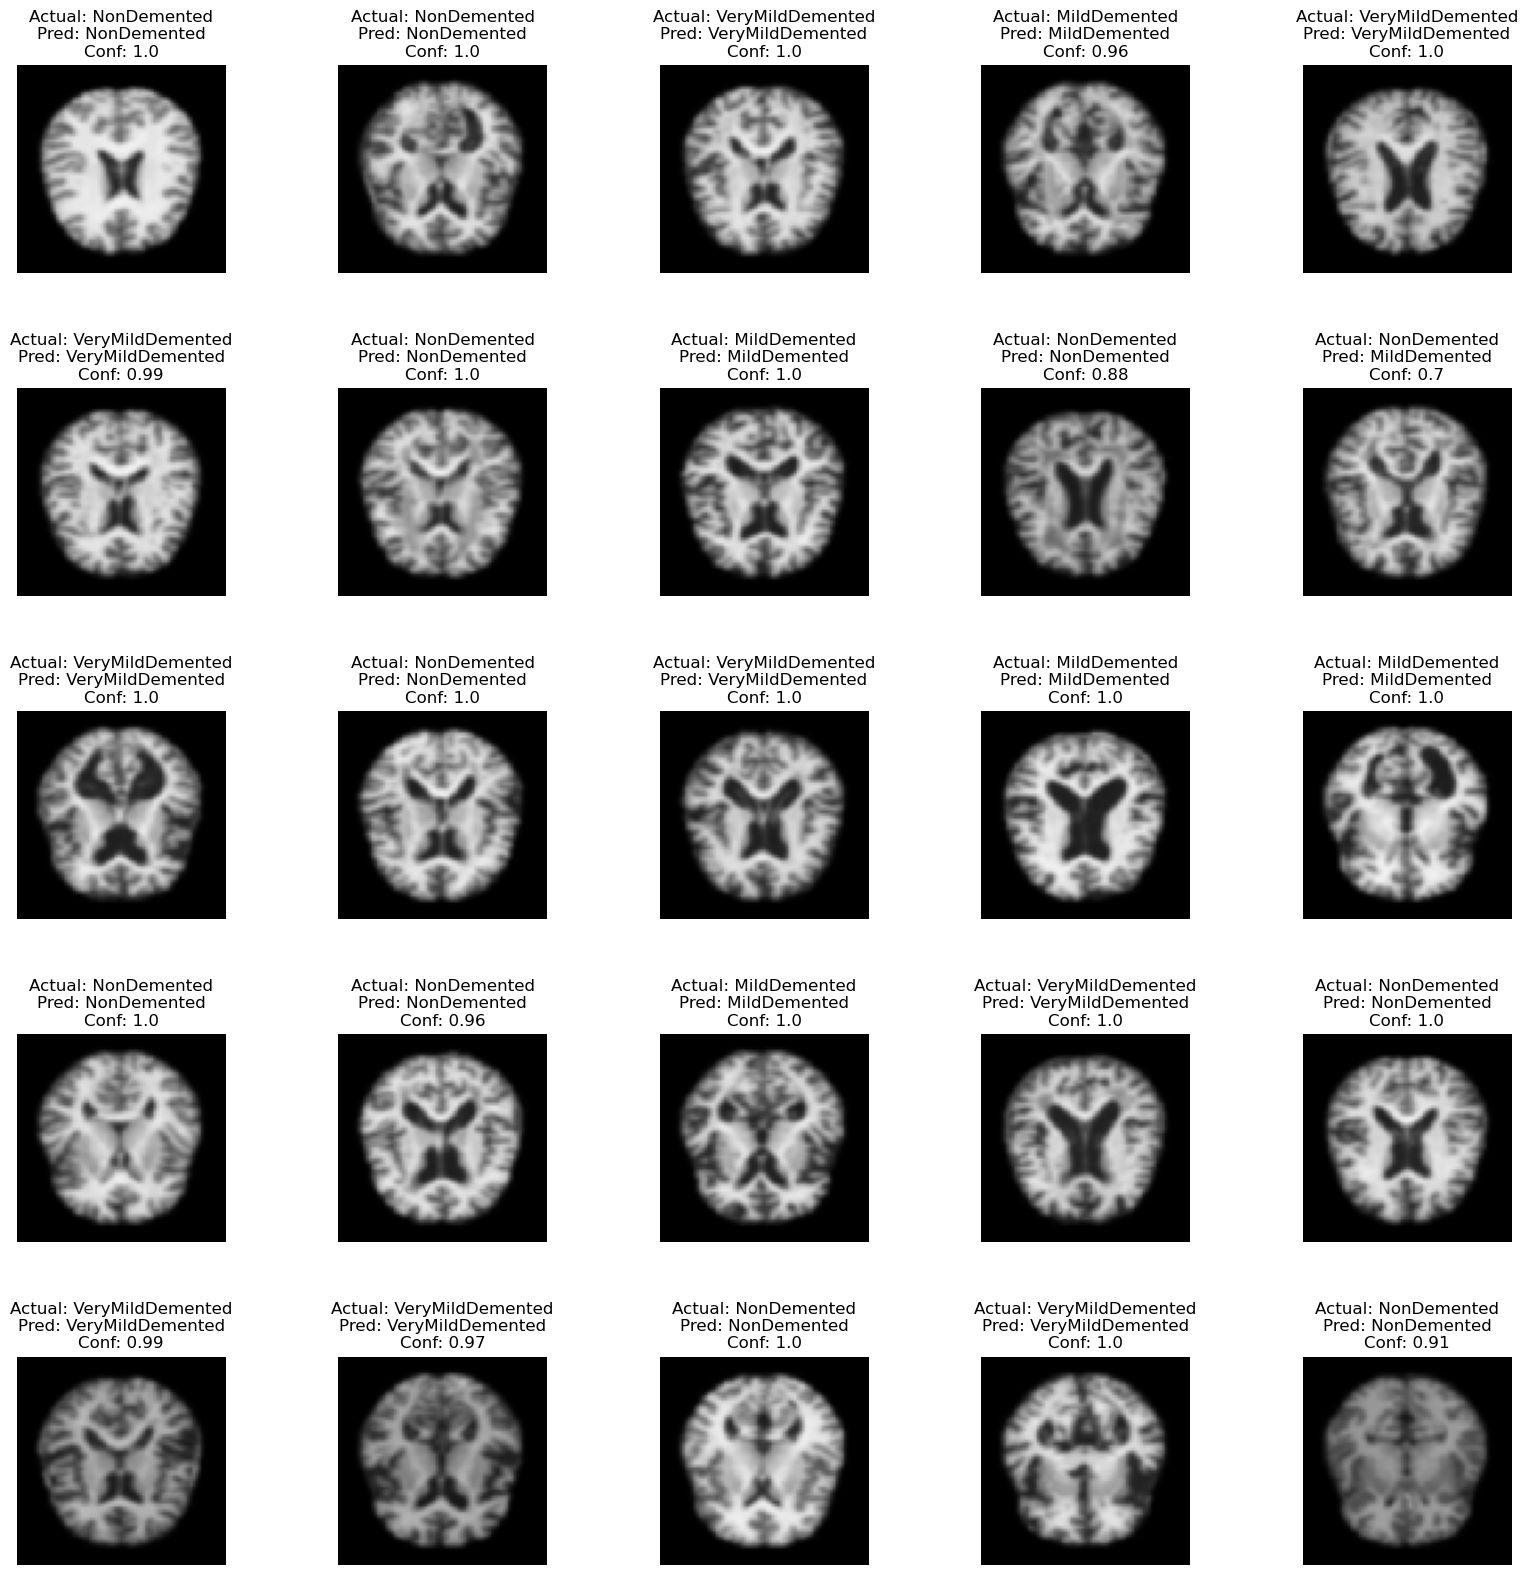

In [96]:
grid_width = 5
grid_height = 5
f, ax = plt.subplots(grid_width, grid_height)
f.set_size_inches(15, 15)

img_idx = 0
for i in range(0, grid_width):
    for j in range(0, grid_height):
        actual = actual_label[img_idx]
        predicted = preds[img_idx]
        confidence = round(pred[img_idx][predicted], 2)
        ax[i][j].axis('off')
        ax[i][j].set_title('Actual: '+labels[actual]+'\nPred: '+labels[predicted] + '\nConf: ' +str(confidence))
        ax[i][j].imshow(X_test[img_idx])
        img_idx += 1

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.5, hspace=0.55)

# **CNN WITH PREPROCESSING [GAUSSIAN FILTER]**

In [99]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(75, 75, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, Y_train, batch_size=10, epochs=25, validation_data=(X_val, Y_val))


Epoch 1/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 53s 108ms/step - accuracy: 0.4713 - loss: 1.0832 - val_accuracy: 0.5571 - val_loss: 0.9602
Epoch 2/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 64s 152ms/step - accuracy: 0.5386 - loss: 0.9893 - val_accuracy: 0.5667 - val_loss: 1.0778
Epoch 3/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 72s 171ms/step - accuracy: 0.5412 - loss: 0.9649 - val_accuracy: 0.5619 - val_loss: 0.9065
Epoch 4/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 46s 107ms/step - accuracy: 0.5766 - loss: 0.8887 - val_accuracy: 0.5524 - val_loss: 0.9225
Epoch 5/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 38s 90ms/step - accuracy: 0.5747 - loss: 0.8607 - val_accuracy: 0.5667 - val_loss: 0.8626
Epoch 6/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 50s 119ms/step - accuracy: 0.6037 - loss: 0.8144 - val_accuracy: 0.5714 - val_loss: 0.8201
Epoch 7/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 46s 110ms/step - accuracy: 0.6215 - loss: 0.7819 - val_accuracy: 0.5667 - val_loss: 0.7726
Epoch 8/25
420/420 ━━━━━━━━━━━━━━━━━━━━ 37s 89ms/step - accuracy: 0.6450 - loss: 0.7

<Axes: >

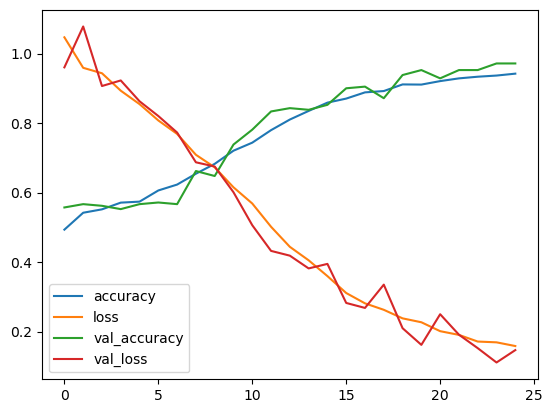

In [100]:
history_df = pd.DataFrame(history.history)
history_df.plot()

In [101]:
model.evaluate(X_test, Y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9589 - loss: 0.1288


[0.13801802694797516, 0.959475576877594]

In [102]:
pred = model.predict(X_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step


In [103]:
print('Model Accuracy score', accuracy_score(np.argmax(pred, axis=1), np.argmax(Y_test, axis=1)))

Model Accuracy score 0.9594755661501788


In [104]:
preds = np.argmax(pred, axis=1)
actual_label = np.argmax(Y_test, axis=1)
print(classification_report(actual_label, preds))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       139
           1       1.00      1.00      1.00        15
           2       0.95      0.98      0.97       384
           3       0.96      0.96      0.96       301

    accuracy                           0.96       839
   macro avg       0.98      0.96      0.97       839
weighted avg       0.96      0.96      0.96       839



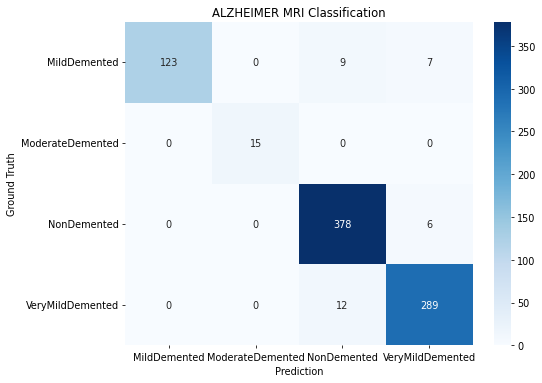

In [105]:
labels=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
cnf = confusion_matrix(actual_label, preds)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('ALZHEIMER MRI Classification')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

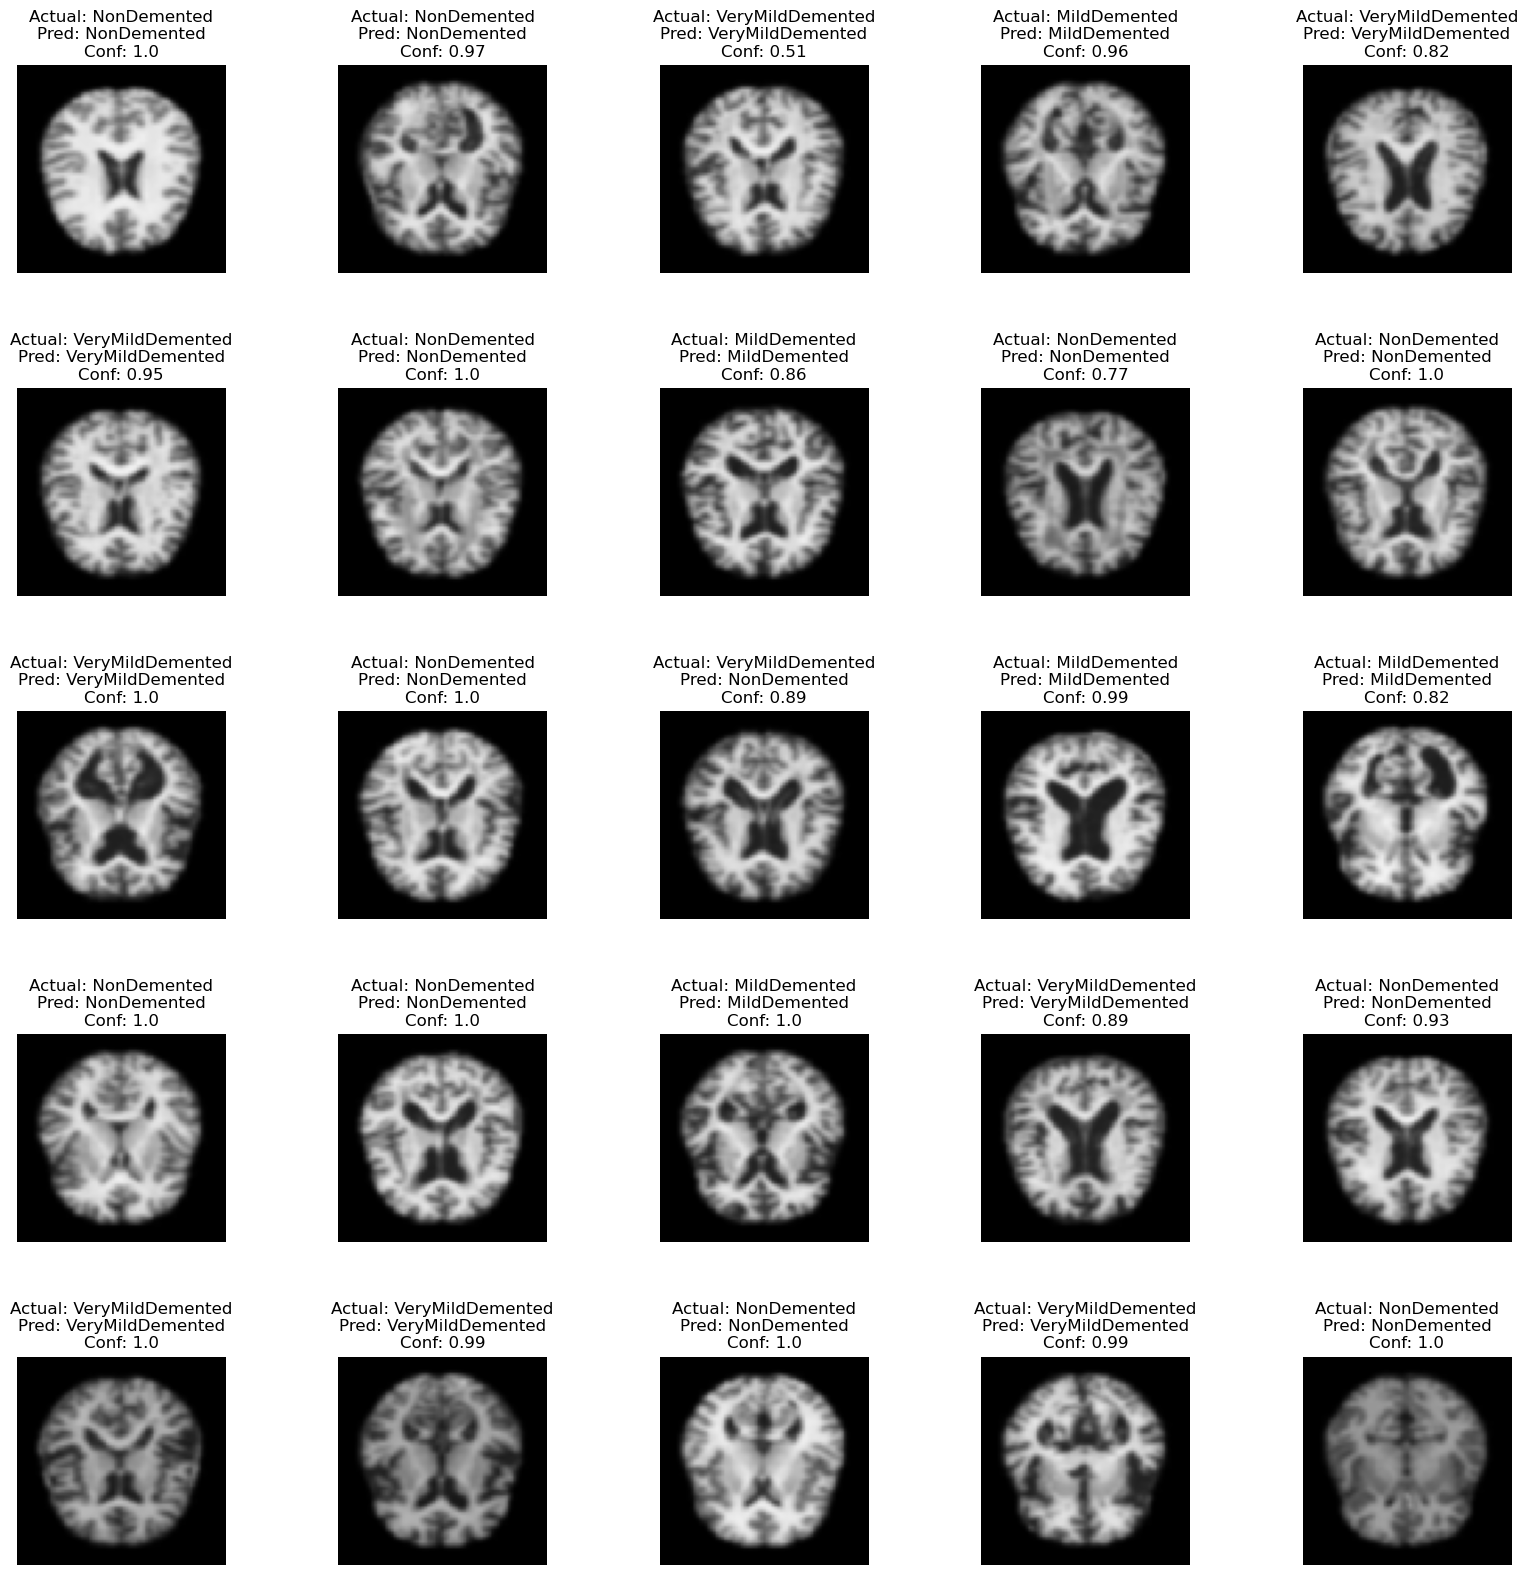

In [106]:
grid_width = 5
grid_height = 5
f, ax = plt.subplots(grid_width, grid_height)
f.set_size_inches(15, 15)

img_idx = 0
for i in range(0, grid_width):
    for j in range(0, grid_height):
        actual = actual_label[img_idx]
        predicted = preds[img_idx]
        confidence = round(pred[img_idx][predicted], 2)
        ax[i][j].axis('off')
        ax[i][j].set_title('Actual: '+labels[actual]+'\nPred: '+labels[predicted] + '\nConf: ' +str(confidence))
        ax[i][j].imshow(X_test[img_idx])
        img_idx += 1

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.5, hspace=0.55)

# **CNN WITH DATA AUGUMENTATION**

In [107]:
Imagedata = pd.DataFrame(index=np.arange(0, len(MildDemented)+len(ModerateDemented)+len(NonDemented)+len(VeryMildDemented)), columns=["image", "target"])
k=0
for c in [0,1,2,3]:
        if c==0:
            for m in range(len(MildDemented)):
                Imagedata.iloc[k]["image"] = MildDemented[m]
                Imagedata.iloc[k]["target"] = 0
                k += 1
        elif c==1:
            for m in range(len(ModerateDemented)):
                Imagedata.iloc[k]["image"] = ModerateDemented[m]
                Imagedata.iloc[k]["target"] = 1
                k += 1
        elif c==2:
             for m in range(len(NonDemented)):
                Imagedata.iloc[k]["image"] = NonDemented[m]
                Imagedata.iloc[k]["target"] = 2
                k += 1
        else:
          for m in range(len(VeryMildDemented)):
            Imagedata.iloc[k]["image"]=VeryMildDemented[m]
            Imagedata.iloc[k]["target"]=3
            k +=1


/var/folders/wv/l2hm1j291j99fw3_373s3kj40000gn/T/ipykernel_7550/2108758194.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Imagedata.iloc[k]["image"] = MildDemented[m]
/var/folders/wv/l2hm1j291j99fw3_373s3kj40000gn/T/ipykernel_7550/21087

In [110]:
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical  # Corrected import
import numpy as np
from tqdm import tqdm

train_image = []
y = []

# Loop through the image dataset
for i in tqdm(range(Imagedata.shape[0])):
    # Load the image with target size (75,75) and RGB color mode
    img = image.load_img(Imagedata['image'].iloc[i], target_size=(75, 75), color_mode='rgb')
    
    # Convert image to array
    img = image.img_to_array(img)
    
    # Normalize the image
    img = img / 255.0
    
    # Append to list
    train_image.append(img)

# Convert the list of images into a numpy array
X = np.array(train_image)

# Extract labels
y = Imagedata.iloc[:, -1].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Further split test data into validation set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=42, test_size=0.2, shuffle=True)

# Convert labels to one-hot encoding using to_categorical
Y_train = to_categorical(y_train, 4)  # Updated function
Y_test = to_categorical(y_test, 4)
Y_val = to_categorical(y_val, 4)

# Print shapes of training, test, and validation sets
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


100%|██████████| 5245/5245 [00:02<00:00, 1870.88it/s]


(4196, 75, 75, 3)
(839, 75, 75, 3)
(210, 75, 75, 3)


In [111]:
datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False,
                             rotation_range=90,
                             zoom_range = 0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=True)

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the Sequential model
model = Sequential()

# First Conv2D layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(75, 75, 3)))
model.add(MaxPooling2D(pool_size=(1, 1)))  # Corrected MaxPooling2D

# Second Conv2D layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Corrected MaxPooling2D

# Third Conv2D layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Corrected MaxPooling2D
model.add(Dropout(0.4))

# Fourth Conv2D layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  # Corrected MaxPooling2D
model.add(Dropout(0.2))

# Flatten the output
model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Assuming you have already defined `datagen` somewhere before
history = model.fit(datagen.flow(X_train, Y_train), batch_size=10, epochs=25, validation_data=(X_val, Y_val))


Epoch 1/25


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


132/132 ━━━━━━━━━━━━━━━━━━━━ 84s 627ms/step - accuracy: 0.4691 - loss: 1.1107 - val_accuracy: 0.5286 - val_loss: 1.0885
Epoch 2/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 92s 694ms/step - accuracy: 0.4945 - loss: 1.0399 - val_accuracy: 0.5095 - val_loss: 1.0502
Epoch 3/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 78s 590ms/step - accuracy: 0.5256 - loss: 0.9795 - val_accuracy: 0.5190 - val_loss: 1.0334
Epoch 4/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 82s 619ms/step - accuracy: 0.5317 - loss: 0.9742 - val_accuracy: 0.5238 - val_loss: 0.9540
Epoch 5/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 98s 746ms/step - accuracy: 0.5474 - loss: 0.9364 - val_accuracy: 0.5810 - val_loss: 0.9214
Epoch 6/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 81s 614ms/step - accuracy: 0.5455 - loss: 0.9330 - val_accuracy: 0.5190 - val_loss: 1.0033
Epoch 7/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 116s 881ms/step - accuracy: 0.5375 - loss: 0.9354 - val_accuracy: 0.6000 - val_loss: 0.9111
Epoch 8/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 85s 648ms/step - accuracy: 0.5497 - loss: 0.9297 - va

<Axes: >

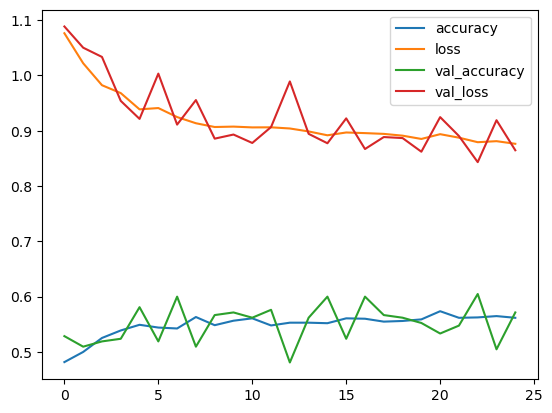

In [114]:
history_df = pd.DataFrame(history.history)
history_df.plot()

In [115]:
model.evaluate(X_test, Y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.5679 - loss: 0.8683


[0.8877166509628296, 0.5589988231658936]

In [116]:
pred = model.predict(X_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step


In [117]:
print('Model Accuracy score', accuracy_score(np.argmax(pred, axis=1), np.argmax(Y_test, axis=1)))

Model Accuracy score 0.5589988081048868


In [118]:
preds = np.argmax(pred, axis=1)
actual_label = np.argmax(Y_test, axis=1)
print(classification_report(actual_label, preds))

              precision    recall  f1-score   support

           0       0.88      0.11      0.19       139
           1       0.00      0.00      0.00        15
           2       0.71      0.64      0.67       384
           3       0.44      0.69      0.53       301

    accuracy                           0.56       839
   macro avg       0.51      0.36      0.35       839
weighted avg       0.63      0.56      0.53       839



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


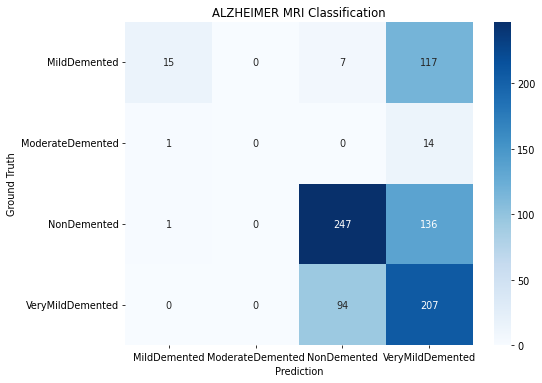

In [119]:
labels=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
cnf = confusion_matrix(actual_label, preds)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('ALZHEIMER MRI Classification')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

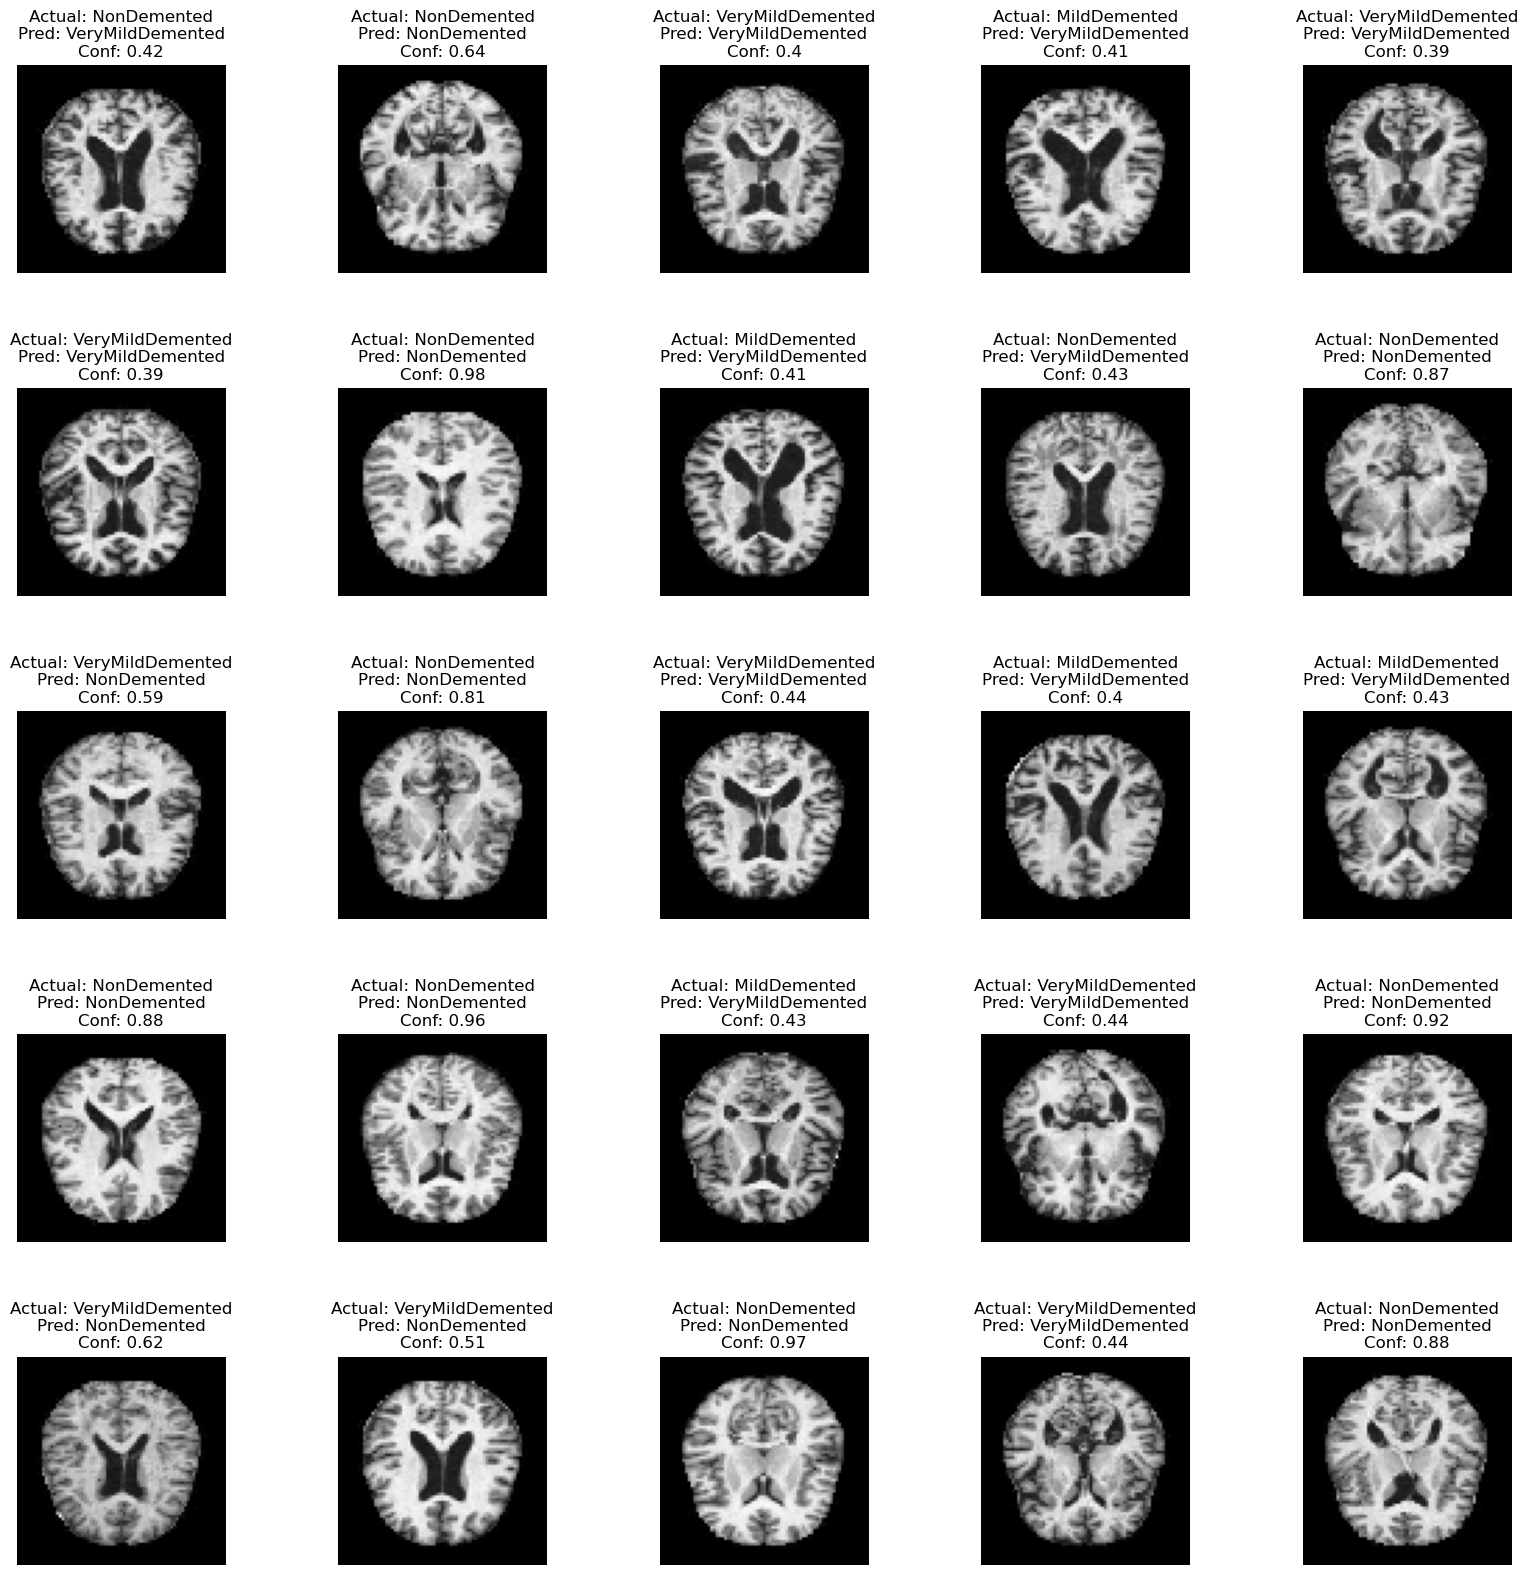

In [120]:
grid_width = 5
grid_height = 5
f, ax = plt.subplots(grid_width, grid_height)
f.set_size_inches(15, 15)

img_idx = 0
for i in range(0, grid_width):
    for j in range(0, grid_height):
        actual = actual_label[img_idx]
        predicted = preds[img_idx]
        confidence = round(pred[img_idx][predicted], 2)
        ax[i][j].axis('off')
        ax[i][j].set_title('Actual: '+labels[actual]+'\nPred: '+labels[predicted] + '\nConf: ' +str(confidence))
        ax[i][j].imshow(X_test[img_idx])
        img_idx += 1

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.5, hspace=0.55)